In [1]:
!pip install tensorflow
!pip install tensorflow==2.4.0
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import imutils
from imutils.contours import sort_contours
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching distribution found for tensorflow==2.4.0


In [2]:
import sys
print(sys.executable)

C:\Users\pahadian\Anaconda3\python.exe


In [3]:
import urllib.request

url = "https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip"
filename = "data.zip" 

urllib.request.urlretrieve(url, filename)

('data.zip', <http.client.HTTPMessage at 0x20620fe5730>)

In [4]:
import zipfile

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('dataCaption') 


In [5]:
x = []
y = []
datadir = 'dataa/dataset'
for folder in os.listdir(datadir):
    path = os.path.join(datadir, folder)
    for images in os.listdir(path):
        img = cv2.imread(os.path.join(path, images))
        x.append(img)
        y.append(folder)
        
print(len(x))
print(len(y))
print(f'labels : {list(set(y))}')

2872
2872
labels : ['fraction', 'non-fraction']


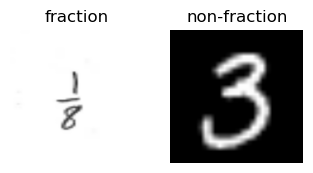

In [6]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10, 10))
j = 0
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(5, 5, j+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

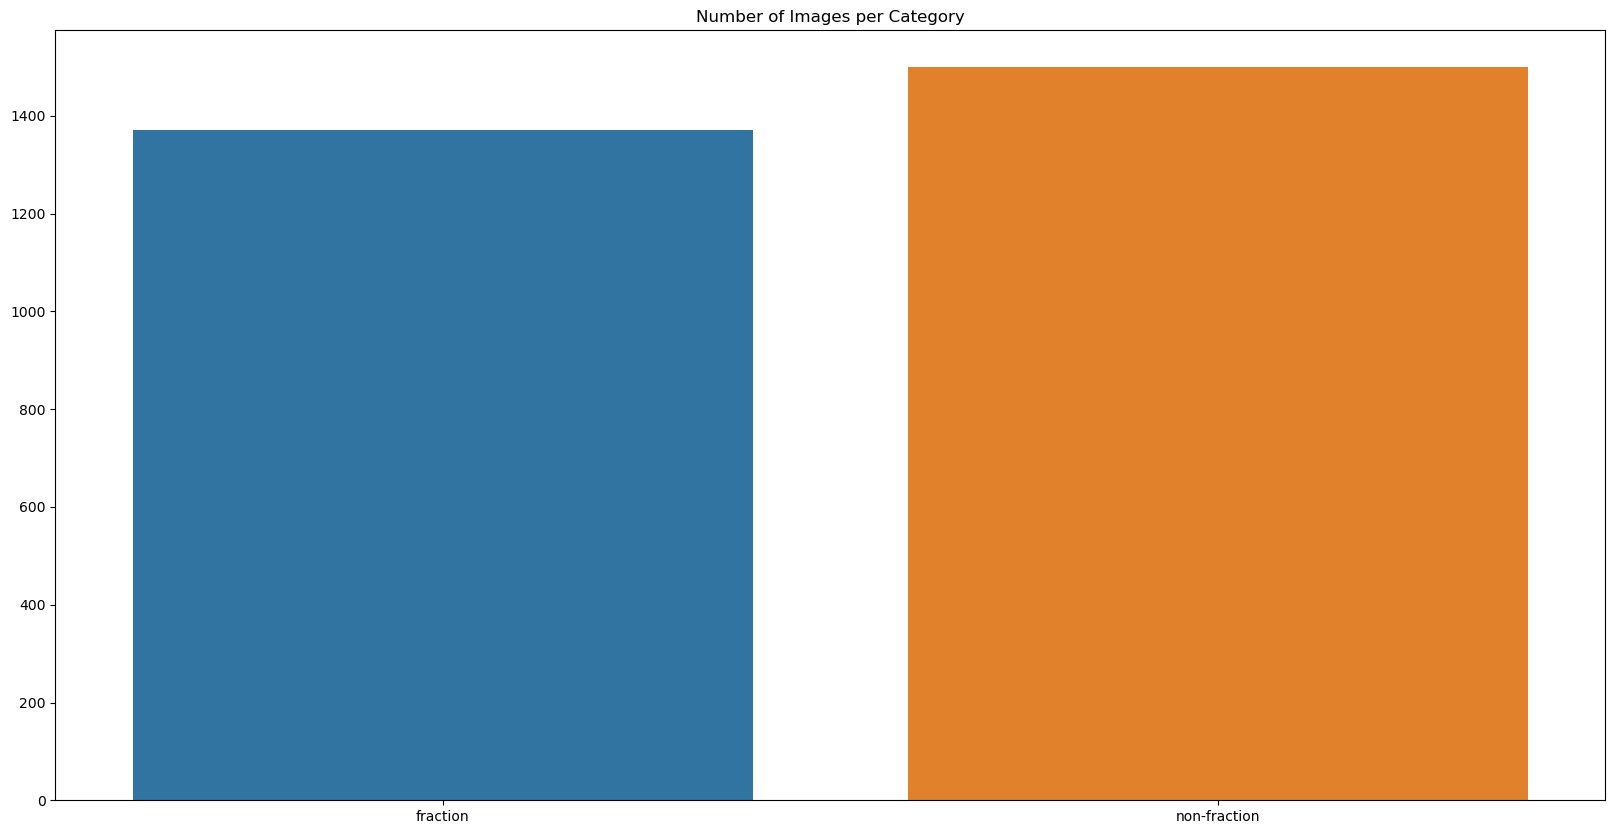

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
unique, count = np.unique(y, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.barplot(x=unique, y=count).set_title('Number of Images per Category')
plt.show()

In [8]:
X = []
for i in range(len(x)):
#     print(i)
    img = x[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshold_image = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
    threshold_image = cv2.resize(threshold_image, (32, 32))
    X.append(threshold_image)
print(len(X))


2872


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(len(y))

2872


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

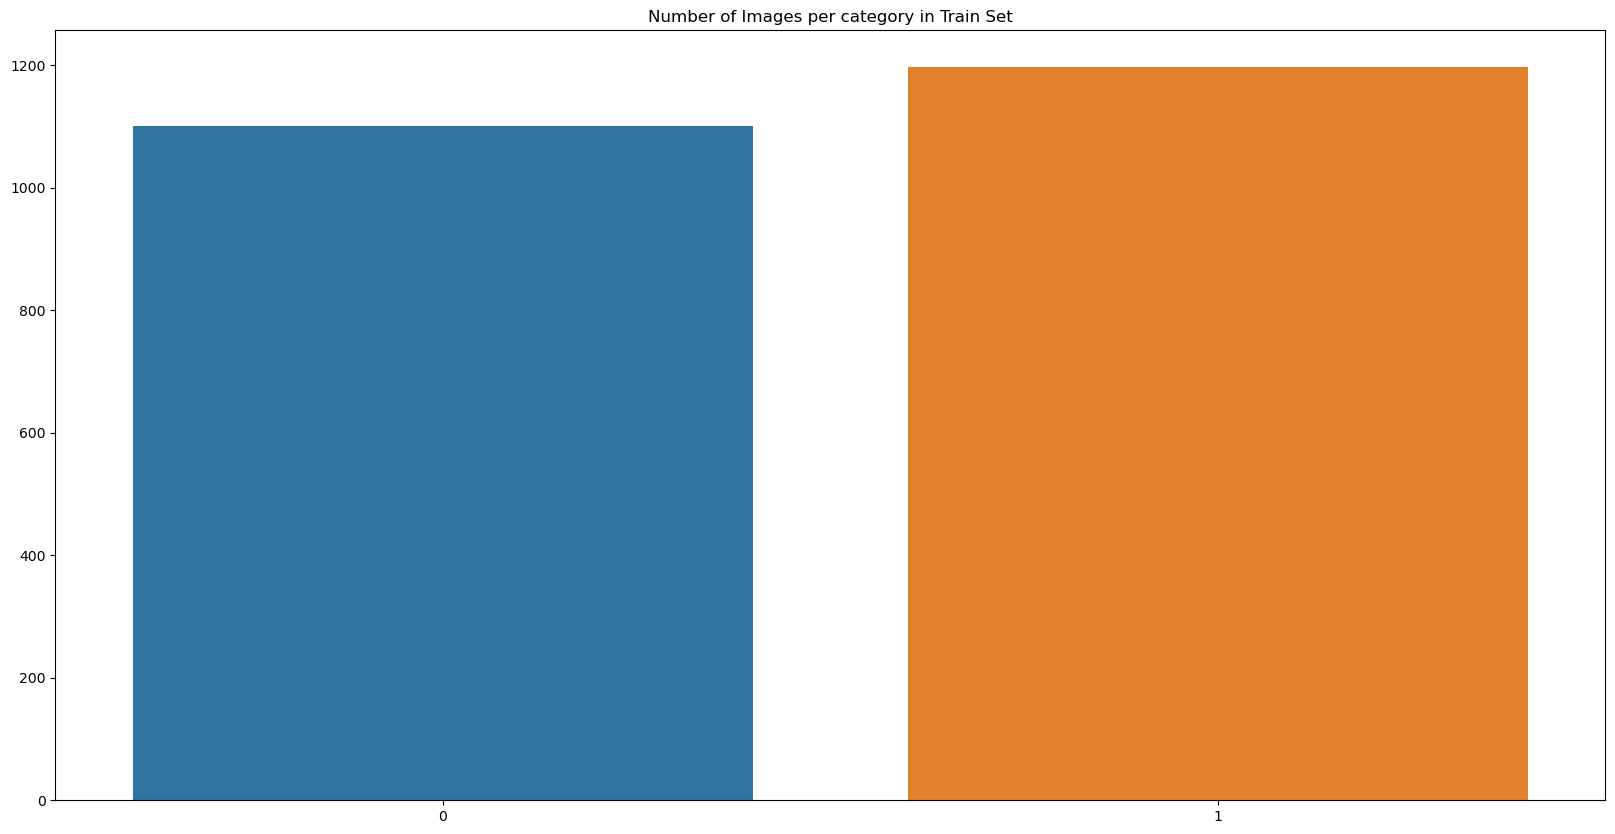

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
unique_train, count_train = np.unique(Y_train, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.barplot(x=unique_train, y=count_train).set_title('Number of Images per category in Train Set')
plt.show()

In [12]:
!pip install tensorflow
import tensorflow as tf

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [14]:
!pip install tensorflow
import tensorflow as tf
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train/255.
X_test = X_test/255.

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2297, 32, 32, 1)
(575, 32, 32, 1)
(2297, 2)
(575, 2)


In [15]:
def math_symbol_and_digits_recognition(input_shape=(32, 32, 1)):
    regularizer = l2(0.01)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv1', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act1'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv2', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act2'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv3', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act3'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(120, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dense(84, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dense(2, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    
    optimizer = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [16]:
model = math_symbol_and_digits_recognition(input_shape=(32, 32, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        320       
                                                                 
 act1 (Activation)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 32)        9248      
                                                                 
 act2 (Activation)           (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                    

In [17]:
def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('maths_symbol_and_digits_recognition.h5', 
                             monitor='val_loss', save_best_only=True, 
                             verbose=1, mode='min')

callbacks = [checkpoint, LearningRateScheduler(step_decay)]

In [18]:
aug = ImageDataGenerator(zoom_range=0.1,
#                          rotation_range=5,
                         width_shift_range=0.05,
                         height_shift_range=0.05)
hist = model.fit(aug.flow(X_train, Y_train, batch_size=128), batch_size=128, epochs=100, validation_data=(X_test, Y_test))
#hist2 = model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test, Y_test), callbacks=callbacks)

Epoch 1/100
18/18 [==============================] - 5s 175ms/step - loss: 3.8193 - accuracy: 0.7144 - val_loss: 2.4526 - val_accuracy: 0.8783
Epoch 2/100
18/18 [==============================] - 3s 172ms/step - loss: 1.3736 - accuracy: 0.9116 - val_loss: 1.2236 - val_accuracy: 0.9617
Epoch 3/100
18/18 [==============================] - 2s 125ms/step - loss: 0.7283 - accuracy: 0.9852 - val_loss: 0.8982 - val_accuracy: 0.9896
Epoch 4/100
18/18 [==============================] - 1s 70ms/step - loss: 0.5497 - accuracy: 0.9865 - val_loss: 0.8636 - val_accuracy: 0.9287
Epoch 5/100
18/18 [==============================] - 2s 93ms/step - loss: 0.4539 - accuracy: 0.9922 - val_loss: 0.6283 - val_accuracy: 0.9983
Epoch 6/100
18/18 [==============================] - 2s 132ms/step - loss: 0.3786 - accuracy: 0.9983 - val_loss: 0.5529 - val_accuracy: 0.9983
Epoch 7/100
18/18 [==============================] - 2s 108ms/step - loss: 0.3278 - accuracy: 0.9983 - val_loss: 0.5048 - val_accuracy: 0.9948
E

18/18 [==============================] - 3s 149ms/step - loss: 0.0905 - accuracy: 0.9917 - val_loss: 0.1456 - val_accuracy: 0.9896
Epoch 59/100
18/18 [==============================] - 2s 130ms/step - loss: 0.0555 - accuracy: 0.9991 - val_loss: 0.1242 - val_accuracy: 0.9930
Epoch 60/100
18/18 [==============================] - 3s 140ms/step - loss: 0.0454 - accuracy: 0.9996 - val_loss: 0.0929 - val_accuracy: 1.0000
Epoch 61/100
18/18 [==============================] - 2s 123ms/step - loss: 0.0525 - accuracy: 0.9956 - val_loss: 0.0917 - val_accuracy: 1.0000
Epoch 62/100
18/18 [==============================] - 3s 158ms/step - loss: 0.0615 - accuracy: 0.9956 - val_loss: 0.1328 - val_accuracy: 0.9826
Epoch 63/100
18/18 [==============================] - 3s 153ms/step - loss: 0.0425 - accuracy: 1.0000 - val_loss: 0.1177 - val_accuracy: 0.9843
Epoch 64/100
18/18 [==============================] - 3s 147ms/step - loss: 0.0390 - accuracy: 0.9996 - val_loss: 0.0840 - val_accuracy: 0.9965
Epoch

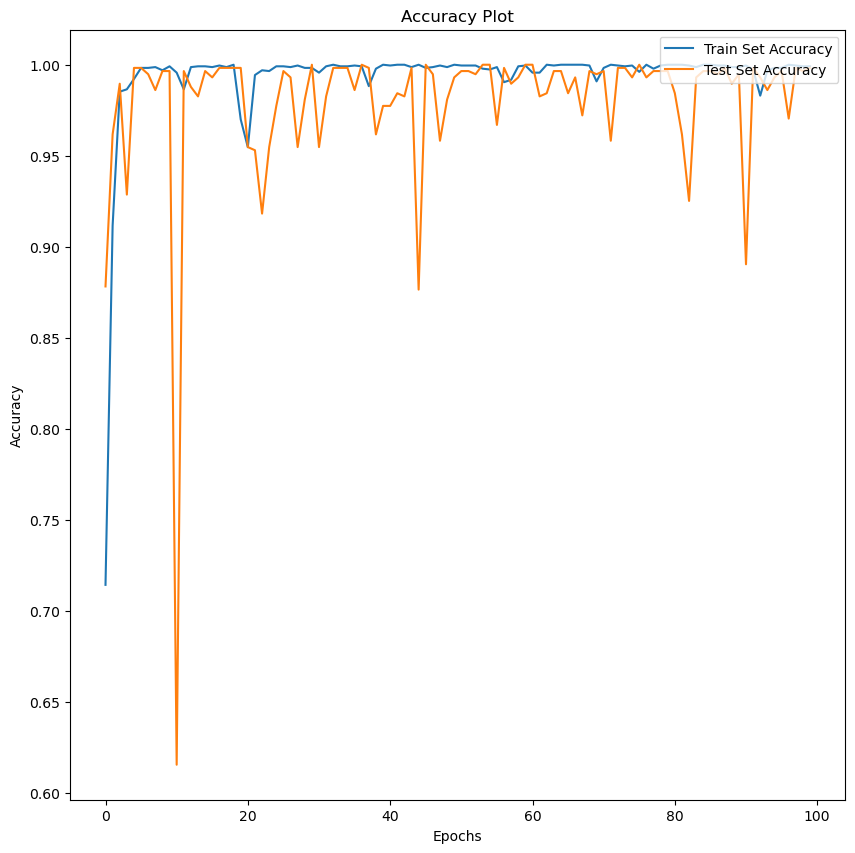

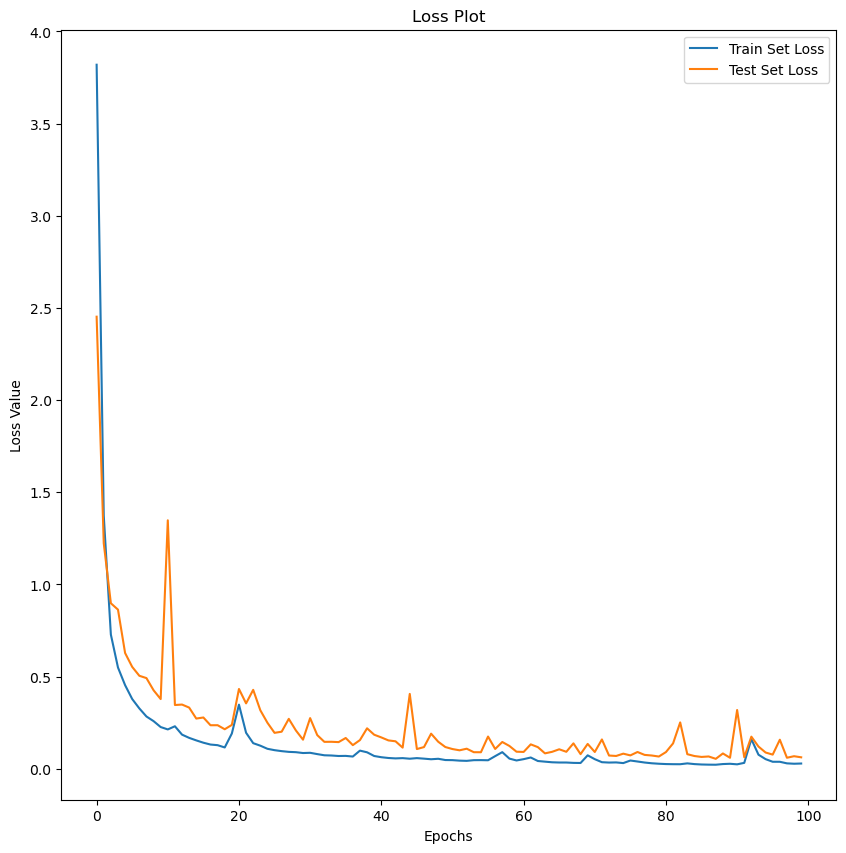

In [19]:
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train Set Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train Set Loss')
plt.plot(hist.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

In [20]:
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(Y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

18/18 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00       303

    accuracy                           1.00       575
   macro avg       1.00      1.00      1.00       575
weighted avg       1.00      1.00      1.00       575



In [21]:
def test_pipeline(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)
    edged = cv2.Canny(img_gray, 30, 150)
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sort_contours(contours, method="left-to-right")[0]
    labels = ['non-fraction', 'fraction']
    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if 20<=w and 30<=h:
            roi = img_gray[y:y+h, x:x+w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            (th, tw) = thresh.shape
            if tw > th:
                thresh = imutils.resize(thresh, width=32)
            if th > tw:
                thresh = imutils.resize(thresh, height=32)
            (th, tw) = thresh.shape
            dx = int(max(0, 32 - tw)/2.0)
            dy = int(max(0, 32 - th) / 2.0)
            padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx, borderType=cv2.BORDER_CONSTANT,
                                       value=(0, 0, 0))
            padded = cv2.resize(padded, (32, 32))
            padded = np.array(padded)
            padded = padded/255.
            padded = np.expand_dims(padded, axis=0)
            padded = np.expand_dims(padded, axis=-1)
            pred = model.predict(padded)
            pred = np.argmax(pred, axis=1)
            label = labels[pred[0]]
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, label, (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    figure = plt.figure(figsize=(10, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [22]:
#Second Version
def test_pipeline(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)
    edged = cv2.Canny(img_gray, 30, 150)
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sort_contours(contours, method="left-to-right")[0]
    labels = ['non-fraction', 'fraction']
    detected_labels = []  # create an empty list to store the labels of detected objects

    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if 20 <= w and 30 <= h:
            roi = img_gray[y:y+h, x:x+w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            (th, tw) = thresh.shape
            if tw > th:
                thresh = imutils.resize(thresh, width=32)
            if th > tw:
                thresh = imutils.resize(thresh, height=32)
            (th, tw) = thresh.shape
            dx = int(max(0, 32 - tw) / 2.0)
            dy = int(max(0, 32 - th) / 2.0)
            padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx,
                                        borderType=cv2.BORDER_CONSTANT,
                                        value=(0, 0, 0))
            padded = cv2.resize(padded, (32, 32))
            padded = np.array(padded)
            padded = padded / 255.
            padded = np.expand_dims(padded, axis=0)
            padded = np.expand_dims(padded, axis=-1)
            pred = model.predict(padded)
            pred = np.argmax(pred, axis=1)
            label = labels[pred[0]]
            detected_labels.append(label)
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, label, (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    figure = plt.figure(figsize=(10, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    return detected_labels  # return the list of detected labels

1/1 [==============================] - 0s 26ms/step


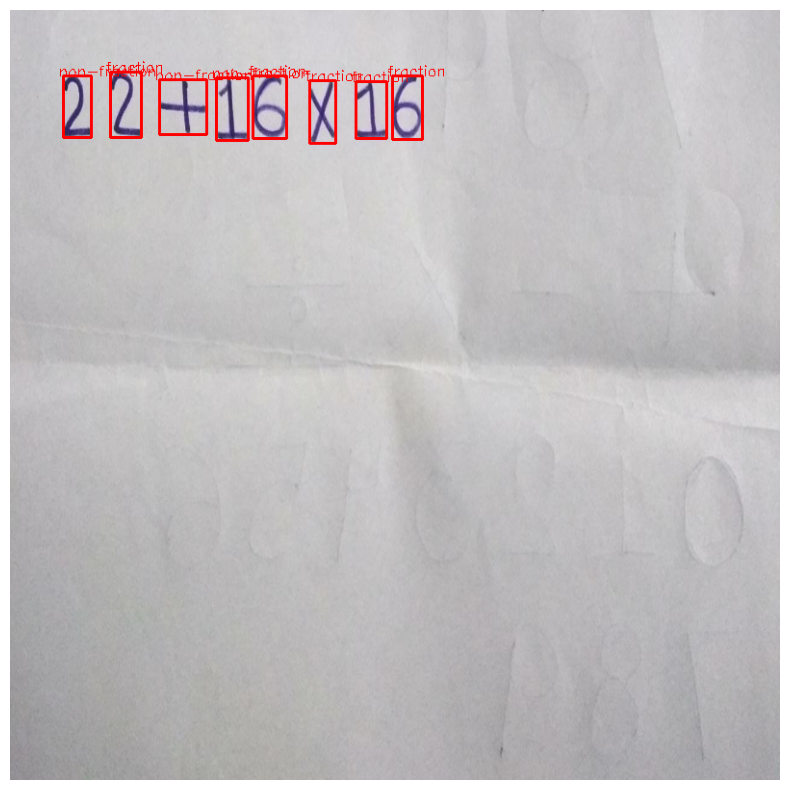

Number of fraction objects: 5


In [23]:
# run object detection
detected_labels = test_pipeline('mytest.jpg')

# count how many 'fraction' labels
fraction_count = detected_labels.count('fraction')

print('Number of fraction objects:', fraction_count)

1/1 [==============================] - 0s 27ms/step


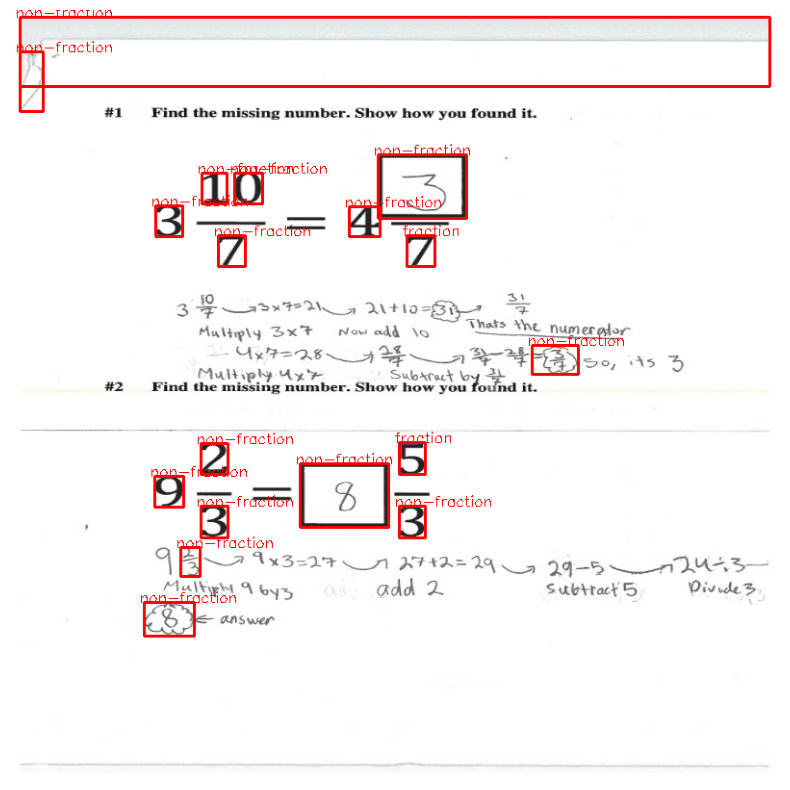

Number of fraction objects: 2


In [24]:
# run object detection
detected_labels = test_pipeline('5.jpg')

# count how many 'fraction' labels
fraction_count = detected_labels.count('fraction')

print('Number of fraction objects:', fraction_count)

1/1 [==============================] - 0s 24ms/step


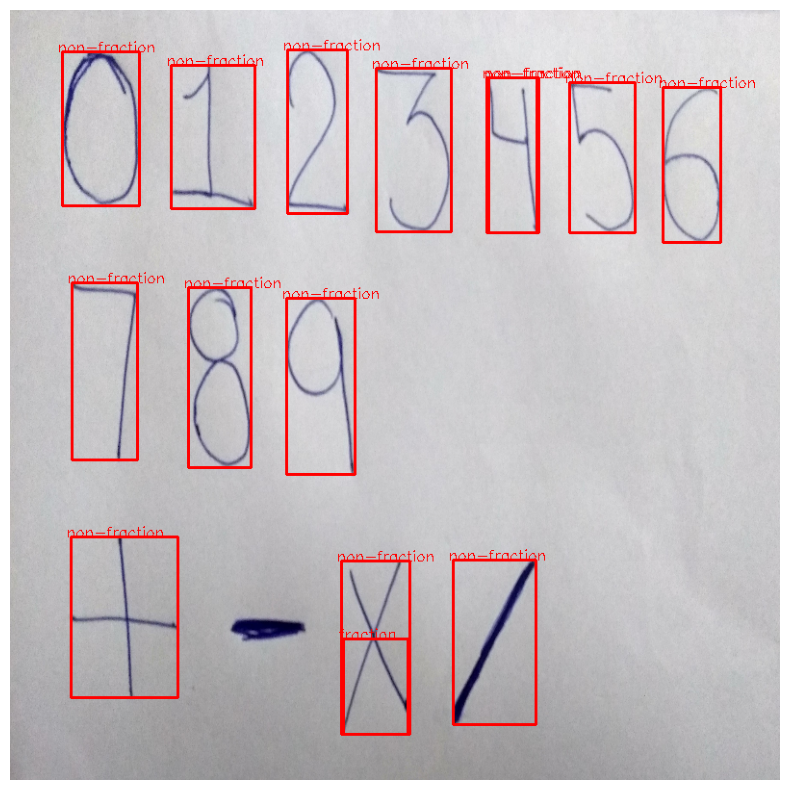

data/test.jpg


In [25]:
test_pipeline('data/test.jpg')
print('data/test.jpg')

1/1 [==============================] - 0s 30ms/step


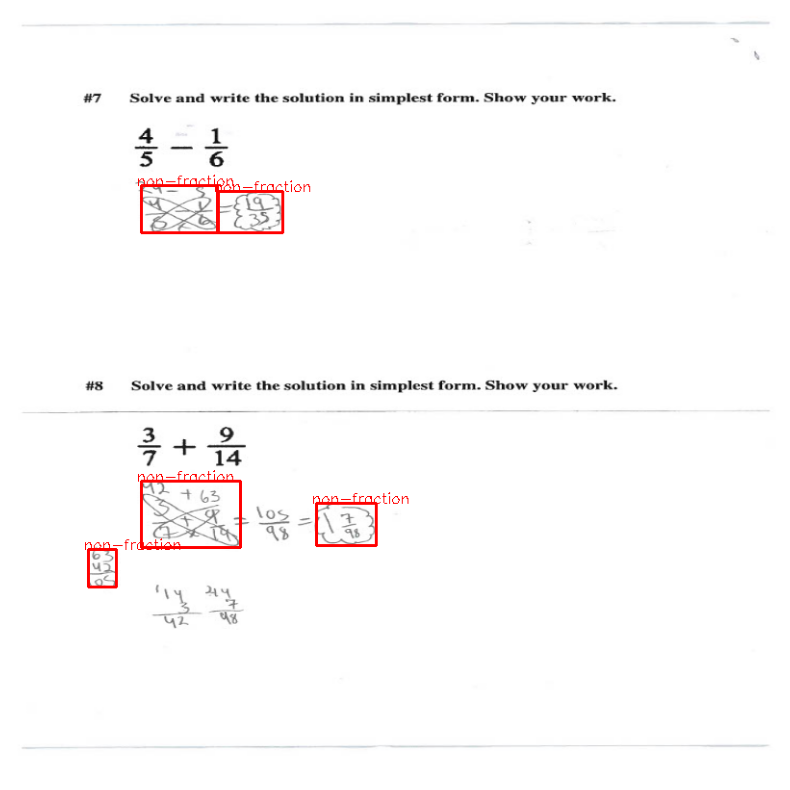

tt.png


In [26]:
test_pipeline('6.jpg')
print('tt.png')

1/1 [==============================] - 0s 30ms/step


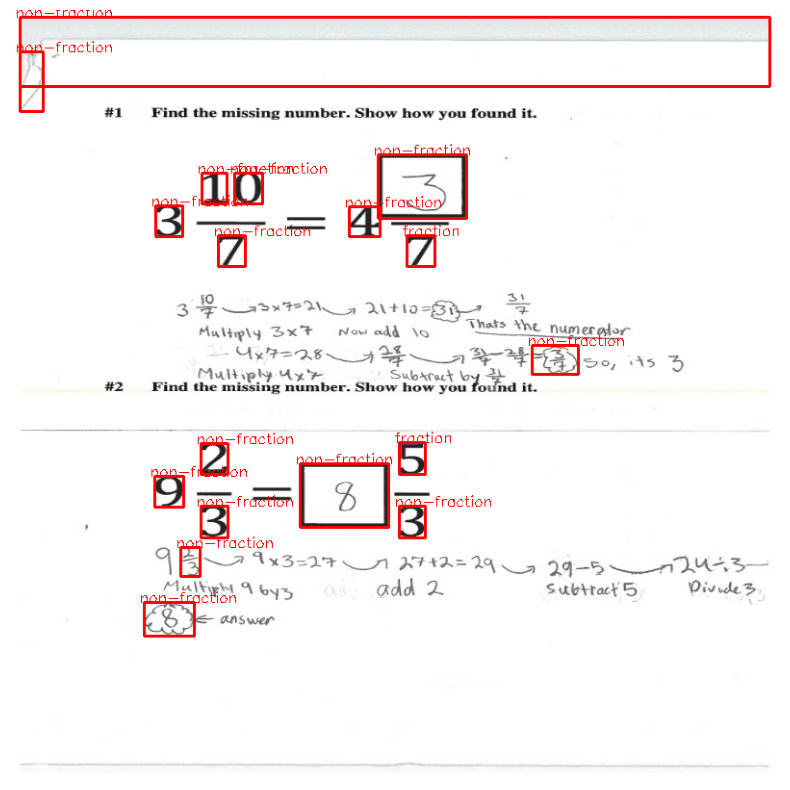

Number of fraction objects: 2


In [27]:
detected_labels = test_pipeline('dataa/5.jpg')

# count how many 'fraction' labels
fraction_count = detected_labels.count('fraction')

print('Number of fraction objects:', fraction_count)

1/1 [==============================] - 0s 24ms/step


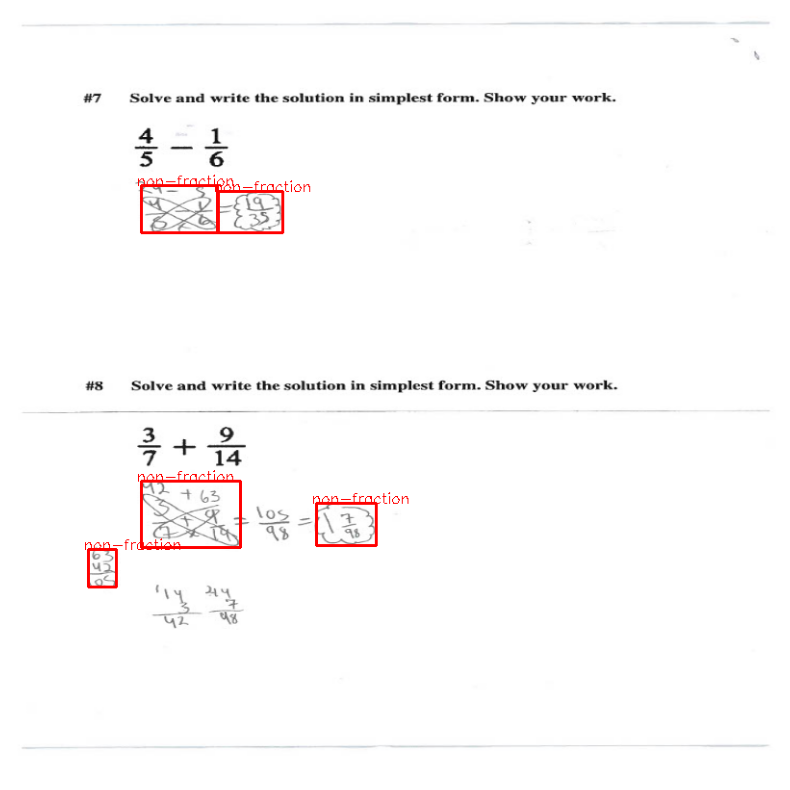

Number of fraction objects: 0


In [28]:
detected_labels = test_pipeline('6.jpg')

fraction_count = detected_labels.count('fraction')

print('Number of fraction objects:', fraction_count)

1/1 [==============================] - 0s 25ms/step


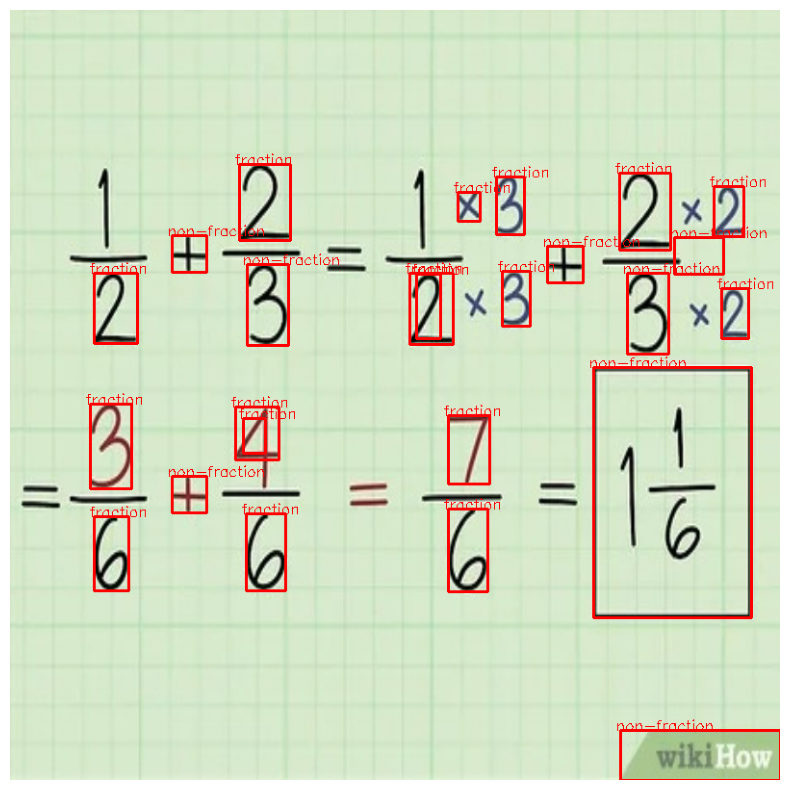

Number of fraction objects: 17


In [29]:
detected_labels = test_pipeline('rightanswer.jpg')

fraction_count = detected_labels.count('fraction')

print('Number of fraction objects:', fraction_count)


1/1 [==============================] - 0s 17ms/step


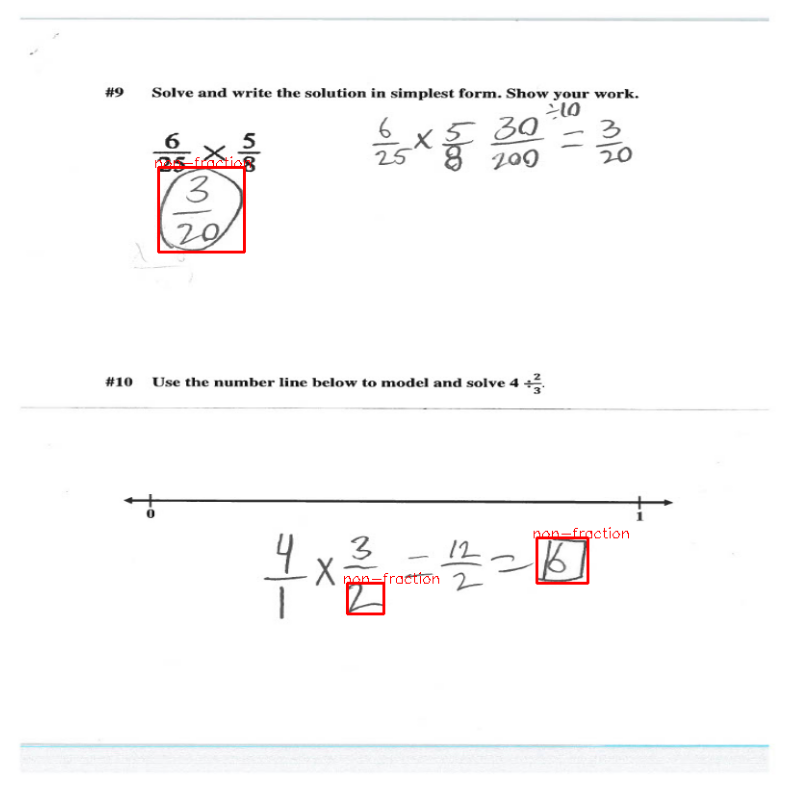

Number of fraction objects: 0


In [30]:
detected_labels = test_pipeline('Grade6_sample11024_17.jpg')

fraction_count = detected_labels.count('fraction')

print('Number of fraction objects:', fraction_count)

1/1 [==============================] - 0s 26ms/step


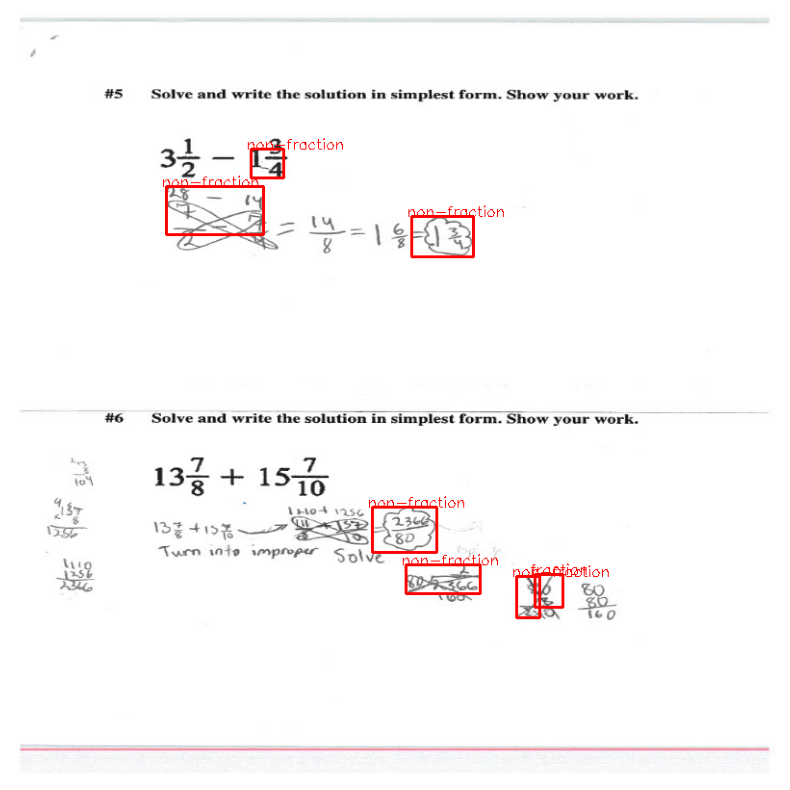

Number of fraction objects: 1


In [31]:
detected_labels = test_pipeline('Grade6_sample11024_3.jpg')

fraction_count = detected_labels.count('fraction')

print('Number of fraction objects:', fraction_count)

1/1 [==============================] - 0s 28ms/step


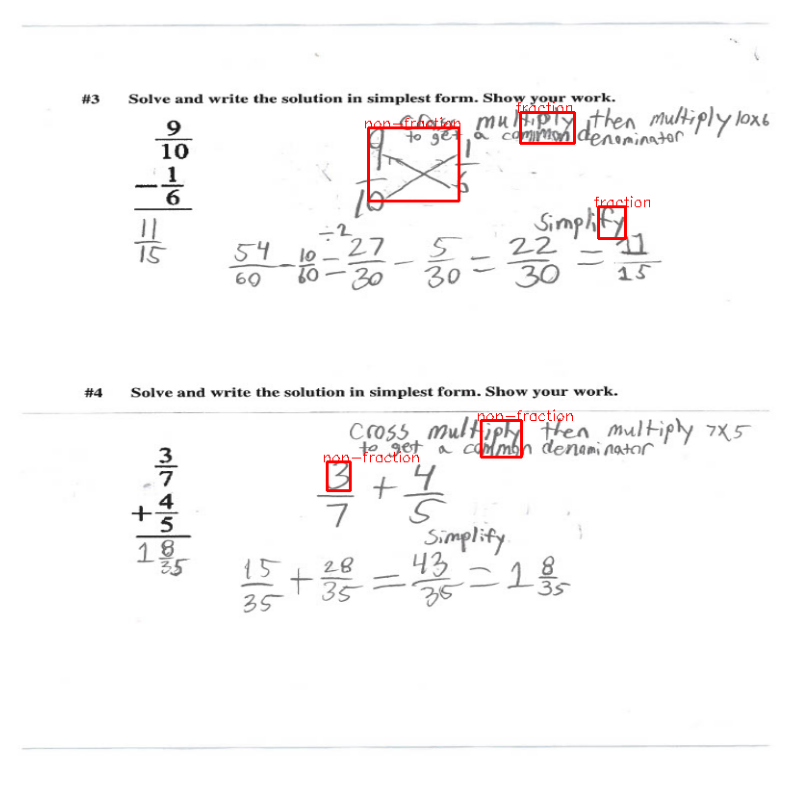

Number of fraction objects: 2


In [32]:
detected_labels = test_pipeline('Grade6_sample11024_14.jpg')

fraction_count = detected_labels.count('fraction')

print('Number of fraction objects:', fraction_count)

1/1 [==============================] - 0s 18ms/step


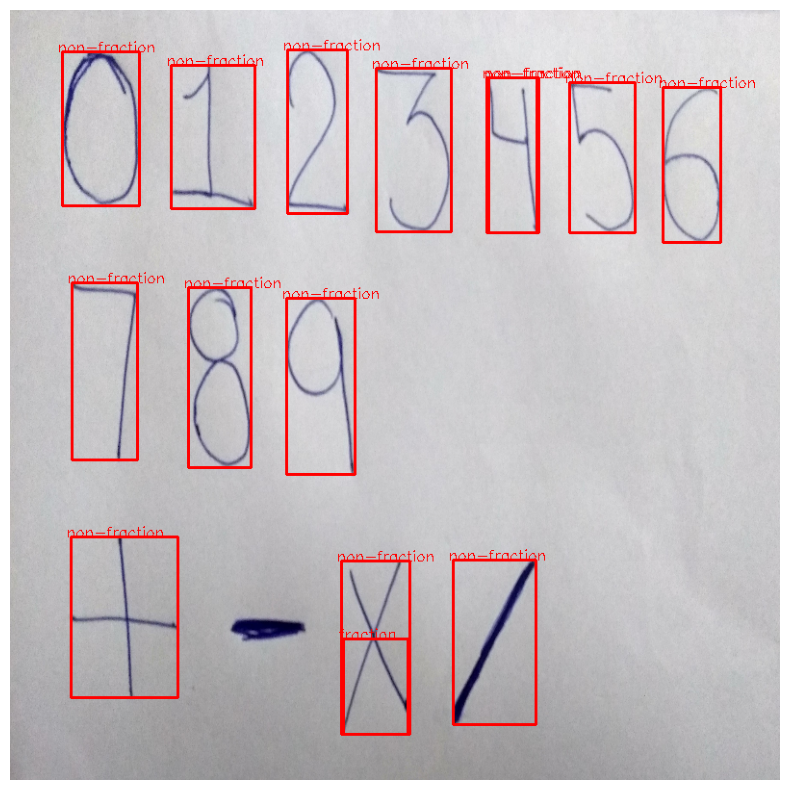

Number of fraction objects: 1


In [33]:
detected_labels = test_pipeline('test.jpg')

fraction_count = detected_labels.count('fraction')

print('Number of fraction objects:', fraction_count)

1/1 [==============================] - 0s 39ms/step


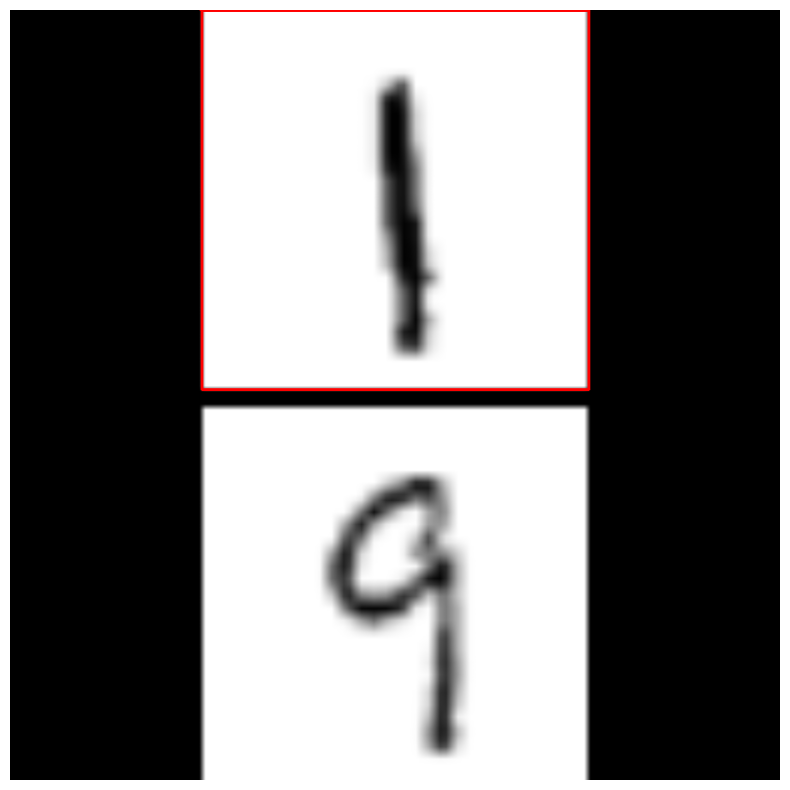

['fraction']

In [34]:
test_pipeline('_new__new_fraction_24.png')

In [ ]:
#**segmentation part**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('testt.jpg', 0)

# Threshold the image
_, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define bounding boxes
bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Sort the bounding boxes from top-to-bottom (and left-to-right within the same line)
bounding_boxes = sorted(bounding_boxes, key=lambda box: (box[1]//20, box[0]))

# Draw bounding boxes around each component
for box in bounding_boxes:
    x, y, w, h = box
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with Matplotlib
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('rightanswer.jpg', 0)

# Threshold the image
_, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define bounding boxes
bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Sort the bounding boxes from top-to-bottom (and left-to-right within the same line)
bounding_boxes = sorted(bounding_boxes, key=lambda box: (box[1]//20, box[0]))

# Draw bounding boxes around each component
for box in bounding_boxes:
    x, y, w, h = box
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)

# Display the image with Matplotlib
plt.figure(figsize=(20,20))
plt.imshow(image, cmap='gray')
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# Set the path for tesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# Load the image
image = cv2.imread('tt.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define bounding boxes
bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Sort the bounding boxes from top-to-bottom (and left-to-right within the same line)
bounding_boxes = sorted(bounding_boxes, key=lambda box: (box[1]//20, box[0]))

# Draw bounding boxes around each component and resize
for box in bounding_boxes:
    x, y, w, h = box
    segment = binary[y:y+h, x:x+w]
    upscale_size = (w, h)
    resized = cv2.resize(segment, upscale_size, interpolation = cv2.INTER_CUBIC)

    # Perform OCR on the resized segments
    # we are assuming each segment is a single character
    text = pytesseract.image_to_string(resized, config='--psm 10 digits -c tessedit_char_whitelist=0123456789+-=/.').strip()

    # Classify and label the recognized text
    label = "non"
    if text.isdigit():
        label = "Num"
    elif text in ['+', '-', '=', '__']:
        label = "Op"

    # Draw the label on the image
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
    cv2.putText(image, f"{label}: {text}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (36,255,12), 1)

# Display the labeled image

plt.figure(figsize=(10,10))  # size in inches
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [1]:
#manipulate digit

In [5]:
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to randomly pick two digits and create a new image
def create_new_image(dataset):
    # Pick two random indices from dataset
    idx1, idx2 = np.random.choice(len(dataset), 2)

    # Get the images and labels for these indices
    img1, label1 = dataset[idx1]
    img2, label2 = dataset[idx2]

    # Stitch the two images together to form a new image
    # The images in MNIST are 1x28x28 (channels x height x width)
    # We want to stitch them side by side, so the new image will be 1x28x56
    new_img = torch.cat((img1, img2), dim=2)

    return new_img, (label1, label2)

# Test the function
new_img, labels = create_new_image(mnist)

# Convert the new image to a PIL Image and display it
new_img_pil = transforms.ToPILImage()(new_img)
new_img_pil.show()

print('Labels:', labels)


Labels: (5, 9)


In [8]:
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to randomly pick two digits and create a new image
def create_new_image(dataset):
    # Pick two random indices from dataset
    idx1, idx2 = np.random.choice(len(dataset), 2)

    # Get the images and labels for these indices
    img1, label1 = dataset[idx1]
    img2, label2 = dataset[idx2]

    # Create a division bar using torch.ones with the same width as the original images and a height of 2
    # This will be a white line in the image
    division_bar = torch.ones([1, 2, 28])

    # Stack the images and the division bar vertically to form a new image
    # The new image will be 1x58x28 (channels x height x width)
    new_img = torch.cat((img1, division_bar, img2), dim=1)

    return new_img, (label1, label2)

# Test the function
new_img, labels = create_new_image(mnist)

# Convert the new image to a PIL Image and display it
new_img_pil = transforms.ToPILImage()(new_img)
new_img_pil.show()

print('Labels:', labels)


Labels: (7, 1)


In [11]:
import os
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np

# Create directories for the nominator, denominator, fraction_bar and result
os.makedirs('nominator', exist_ok=True)
os.makedirs('denominator', exist_ok=True)
os.makedirs('fraction_bar', exist_ok=True)
os.makedirs('result', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to randomly pick two digits and create new images
def create_new_images(dataset):
    # Pick two random indices from dataset
    idx1, idx2 = np.random.choice(len(dataset), 2)

    # Get the images and labels for these indices
    img1, label1 = dataset[idx1]
    img2, label2 = dataset[idx2]

    # Create a fraction bar using torch.ones with the same width as the original images and a height of 2
    # This will be a white line in the image
    fraction_bar = torch.ones([1, 2, 28])

    return img1, img2, fraction_bar, (label1, label2)

# Test the function
nominator_img, denominator_img, fraction_bar_img, labels = create_new_images(mnist)

# Convert the images to a PIL Images and save them
Image.fromarray(nominator_img.numpy()[0] * 255).convert('L').save(f'nominator/{labels[0]}.png')
Image.fromarray(denominator_img.numpy()[0] * 255).convert('L').save(f'denominator/{labels[1]}.png')
Image.fromarray(fraction_bar_img.numpy()[0] * 255).convert('L').save('fraction_bar/fraction_bar.png')

# Create the final image by stacking the nominator, fraction bar, and denominator vertically
final_img = torch.cat((nominator_img, fraction_bar_img, denominator_img), dim=1)

# Convert the final image to a PIL Image and save it
Image.fromarray(final_img.numpy()[0] * 255).convert('L').save(f'result/{labels[0]}_{labels[1]}.png')

print('Labels:', labels)


Labels: (9, 4)


In [2]:
#Generate 400 fractions randomly and save in the result folder
import os
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np

# Create directories for the nominator, denominator, fraction_bar and result
os.makedirs('numerator', exist_ok=True)
os.makedirs('denominator', exist_ok=True)
os.makedirs('fraction_bar', exist_ok=True)
os.makedirs('result_fraction', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to randomly pick two digits and create new images
def create_new_images(dataset):
    # Pick two random indices from dataset
    idx1, idx2 = np.random.choice(len(dataset), 2)

    # Get the images and labels for these indices
    img1, label1 = dataset[idx1]
    img2, label2 = dataset[idx2]

    # Create a fraction bar using torch.ones with the same width as the original images and a height of 2
    # This will be a white line in the image
    fraction_bar = torch.ones([1, 2, 28])

    return img1, img2, fraction_bar, (label1, label2)

# Generate 400 fraction images
for i in range(1, 401):
    # Create new images
    nominator_img, denominator_img, fraction_bar_img, labels = create_new_images(mnist)

    # Convert the images to a PIL Images and save them
    Image.fromarray(nominator_img.numpy()[0] * 255).convert('L').save(f'numerator/{labels[0]}_{i}.png')
    Image.fromarray(denominator_img.numpy()[0] * 255).convert('L').save(f'denominator/{labels[1]}_{i}.png')
    Image.fromarray(fraction_bar_img.numpy()[0] * 255).convert('L').save(f'fraction_bar/fraction_bar_{i}.png')

    # Create the final image by stacking the nominator, fraction bar, and denominator vertically
    final_img = torch.cat((nominator_img, fraction_bar_img, denominator_img), dim=1)

    # Convert the final image to a PIL Image and save it
    Image.fromarray(final_img.numpy()[0] * 255).convert('L').save(f'result/{labels[0]}_{labels[1]}_{i}.png')

    print(f'Generated fraction {i}: {labels[0]}/{labels[1]}')


Generated fraction 1: 6/8
Generated fraction 2: 2/9
Generated fraction 3: 3/8
Generated fraction 4: 0/2
Generated fraction 5: 1/7
Generated fraction 6: 6/1
Generated fraction 7: 1/6
Generated fraction 8: 4/9
Generated fraction 9: 9/0
Generated fraction 10: 1/4
Generated fraction 11: 2/2
Generated fraction 12: 0/9
Generated fraction 13: 1/1
Generated fraction 14: 2/9
Generated fraction 15: 6/7
Generated fraction 16: 5/0
Generated fraction 17: 4/3
Generated fraction 18: 8/1
Generated fraction 19: 0/0
Generated fraction 20: 5/3
Generated fraction 21: 1/7
Generated fraction 22: 1/1
Generated fraction 23: 9/3
Generated fraction 24: 0/2
Generated fraction 25: 7/6
Generated fraction 26: 6/0
Generated fraction 27: 3/8
Generated fraction 28: 3/1
Generated fraction 29: 5/2
Generated fraction 30: 7/2
Generated fraction 31: 5/3
Generated fraction 32: 9/9
Generated fraction 33: 5/5
Generated fraction 34: 3/0
Generated fraction 35: 1/8
Generated fraction 36: 2/8
Generated fraction 37: 5/6
Generated 

Generated fraction 330: 5/9
Generated fraction 331: 2/7
Generated fraction 332: 2/1
Generated fraction 333: 5/4
Generated fraction 334: 9/9
Generated fraction 335: 9/3
Generated fraction 336: 2/8
Generated fraction 337: 0/4
Generated fraction 338: 6/5
Generated fraction 339: 2/6
Generated fraction 340: 3/6
Generated fraction 341: 4/3
Generated fraction 342: 0/2
Generated fraction 343: 7/8
Generated fraction 344: 0/2
Generated fraction 345: 8/6
Generated fraction 346: 2/2
Generated fraction 347: 6/8
Generated fraction 348: 8/4
Generated fraction 349: 2/9
Generated fraction 350: 1/5
Generated fraction 351: 3/4
Generated fraction 352: 2/1
Generated fraction 353: 2/3
Generated fraction 354: 7/6
Generated fraction 355: 1/9
Generated fraction 356: 1/9
Generated fraction 357: 1/2
Generated fraction 358: 1/7
Generated fraction 359: 1/8
Generated fraction 360: 2/9
Generated fraction 361: 9/6
Generated fraction 362: 4/8
Generated fraction 363: 4/4
Generated fraction 364: 7/7
Generated fraction 3

In [49]:
#Generate 400 fractions randomly and save in the result folder with wired slash
import os
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np

# Create directories for the nominator, denominator, fraction_bar and result
os.makedirs('nominator', exist_ok=True)
os.makedirs('denominator', exist_ok=True)
os.makedirs('slash_bar', exist_ok=True)
os.makedirs('result', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to randomly pick two digits and create new images
def create_new_images(dataset):
    # Pick two random indices from dataset
    idx1, idx2 = np.random.choice(len(dataset), 2)

    # Get the images and labels for these indices
    img1, label1 = dataset[idx1]
    img2, label2 = dataset[idx2]

    # Create a fraction bar using torch.ones to resemble a slash.
    # The width and height are 28 to match the image dimensions.
    fraction_bar = torch.tril(torch.ones([28, 28])) # this creates a lower triangular matrix, which resembles a slash

    return img1, img2, fraction_bar, (label1, label2)

# Generate 400 fraction images
for i in range(1, 401):
    # Create new images
    nominator_img, denominator_img, slash_bar_img, labels = create_new_images(mnist)

    # Convert the images to a PIL Images and save them
    Image.fromarray(nominator_img.numpy()[0] * 255).convert('L').save(f'nominator/{labels[0]}_{i}.png')
    Image.fromarray(denominator_img.numpy()[0] * 255).convert('L').save(f'denominator/{labels[1]}_{i}.png')
    Image.fromarray((slash_bar_img.numpy() * 255).astype(np.uint8)).convert('L').save(f'slash_bar/slash_bar_{i}.png')

    # Create the final image by stacking the nominator, fraction bar, and denominator vertically
    final_img = torch.cat((nominator_img, torch.unsqueeze(slash_bar_img,0), denominator_img), dim=1)

    # Convert the final image to a PIL Image and save it
    Image.fromarray((final_img.numpy()[0] * 255).astype(np.uint8)).convert('L').save(f'result/{labels[0]}_{labels[1]}_{i}.png')

    print(f'Generated fraction {i}: {labels[0]}/{labels[1]}')


Generated fraction 1: 1/6
Generated fraction 2: 7/4
Generated fraction 3: 0/8
Generated fraction 4: 5/5
Generated fraction 5: 2/7
Generated fraction 6: 0/6
Generated fraction 7: 4/0
Generated fraction 8: 0/4
Generated fraction 9: 0/2
Generated fraction 10: 3/2
Generated fraction 11: 5/9
Generated fraction 12: 2/5
Generated fraction 13: 1/0
Generated fraction 14: 1/9
Generated fraction 15: 1/8
Generated fraction 16: 3/0
Generated fraction 17: 7/3
Generated fraction 18: 7/2
Generated fraction 19: 4/4
Generated fraction 20: 0/8
Generated fraction 21: 1/6
Generated fraction 22: 2/5
Generated fraction 23: 0/9
Generated fraction 24: 0/0
Generated fraction 25: 3/1
Generated fraction 26: 9/1
Generated fraction 27: 9/9
Generated fraction 28: 7/3
Generated fraction 29: 8/3
Generated fraction 30: 6/3
Generated fraction 31: 6/8
Generated fraction 32: 7/4
Generated fraction 33: 8/5
Generated fraction 34: 6/1
Generated fraction 35: 7/0
Generated fraction 36: 8/6
Generated fraction 37: 9/4
Generated 

Generated fraction 317: 3/8
Generated fraction 318: 2/8
Generated fraction 319: 6/9
Generated fraction 320: 3/5
Generated fraction 321: 8/1
Generated fraction 322: 9/7
Generated fraction 323: 9/3
Generated fraction 324: 2/9
Generated fraction 325: 6/9
Generated fraction 326: 6/0
Generated fraction 327: 5/5
Generated fraction 328: 2/6
Generated fraction 329: 3/3
Generated fraction 330: 4/5
Generated fraction 331: 3/6
Generated fraction 332: 9/9
Generated fraction 333: 4/3
Generated fraction 334: 2/1
Generated fraction 335: 2/5
Generated fraction 336: 5/3
Generated fraction 337: 0/0
Generated fraction 338: 9/4
Generated fraction 339: 7/2
Generated fraction 340: 6/9
Generated fraction 341: 8/7
Generated fraction 342: 8/8
Generated fraction 343: 7/1
Generated fraction 344: 9/9
Generated fraction 345: 2/9
Generated fraction 346: 0/1
Generated fraction 347: 5/0
Generated fraction 348: 5/7
Generated fraction 349: 8/4
Generated fraction 350: 3/9
Generated fraction 351: 1/5
Generated fraction 3

In [50]:
import os
import cv2
import numpy as np

# Function to detect and label the components of a fraction in an image
def detect_and_label(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Threshold the image to binary using Otsu's method
    _, bin_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours in the image
    contours, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if we found at least three contours
    if len(contours) < 3:
        print(f"Cannot process {image_path} due to insufficient contours. Skipping.")
        return

    # Sort contours based on the area
    contours = sorted(contours, key=cv2.contourArea)

    # Assume the fraction bar is the smallest contour
    fraction_bar = contours[0]

    # Everything else is part of the numbers
    numbers = contours[1:]

    # Check if we found exactly two numbers
    if len(numbers) != 2:
        print(f"Cannot process {image_path} because it does not contain exactly two numbers. Skipping.")
        return

    # Assume the nominator is the number contour with the highest (smallest y) centroid
    # And the denominator is the other number
    centroids = [np.mean(number.reshape(-1, 2), axis=0)[1] for number in numbers] # Corrected to only consider y-coordinate
    nominator, denominator = numbers[np.argmin(centroids)], numbers[np.argmax(centroids)]

    # Create an empty copy of the binary image to draw the labels
    label_img = np.zeros_like(bin_img)

    # Draw the labels on the image
    cv2.drawContours(label_img, [nominator], -1, (255), -1)
    cv2.drawContours(label_img, [denominator], -1, (127), -1)
    cv2.drawContours(label_img, [fraction_bar], -1, (63), -1)

    # Save the labeled image to the output directory
    _, filename = os.path.split(image_path)
    cv2.imwrite(f'obj_output/{filename}', label_img)

# Create the output directory if it doesn't exist
os.makedirs('obj_output', exist_ok=True)

# Detect and label the specific image
detect_and_label("result/0_5_223.png")  # replace with your image path


In [51]:
#Generate 400 fractions randomly and save in the result folder with slash /
import os
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np

# Create directories for the nominator, denominator, slash_bar and result
os.makedirs('nominator', exist_ok=True)
os.makedirs('denominator', exist_ok=True)
os.makedirs('slash_bar', exist_ok=True)
os.makedirs('result', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create the slash bar image and convert it to a tensor
# Create the slash bar image and convert it to a tensor
slash_img_np = np.zeros((28, 28))
np.fill_diagonal(slash_img_np, 1)  # Fill the diagonal with ones (white color)
slash_img_np = np.flip(slash_img_np, axis=0).copy()  # Flip to match the direction of "/", and then make a copy
slash_tensor = torch.Tensor(slash_img_np)

# Function to randomly pick two digits and create new images
def create_new_images(dataset):
    # Pick two random indices from dataset
    idx1, idx2 = np.random.choice(len(dataset), 2)

    # Get the images and labels for these indices
    img1, label1 = dataset[idx1]
    img2, label2 = dataset[idx2]

    return img1, img2, slash_tensor, (label1, label2)

# Generate 400 fraction images
for i in range(1, 401):
    # Create new images
    nominator_img, denominator_img, slash_img, labels = create_new_images(mnist)

    # Convert the images to a PIL Images and save them
    Image.fromarray((nominator_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'nominator/{labels[0]}_{i}.png')
    Image.fromarray((denominator_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'denominator/{labels[1]}_{i}.png')
    Image.fromarray((slash_img.numpy()*255).astype(np.uint8)).convert('L').save(f'slash_bar/slash_{i}.png')

    # Create the final image by stacking the nominator, slash, and denominator vertically
    final_img = torch.cat((nominator_img, slash_tensor.unsqueeze(0), denominator_img), dim=1)

    # Convert the final image to a PIL Image and save it
    Image.fromarray((final_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'result/{labels[0]}_{labels[1]}_{i}.png')

    print(f'Generated fraction {i}: {labels[0]}/{labels[1]}')



Generated fraction 1: 9/5
Generated fraction 2: 5/4
Generated fraction 3: 6/2
Generated fraction 4: 0/2
Generated fraction 5: 7/8
Generated fraction 6: 8/9
Generated fraction 7: 2/1
Generated fraction 8: 2/4
Generated fraction 9: 6/9
Generated fraction 10: 9/9
Generated fraction 11: 6/2
Generated fraction 12: 2/3
Generated fraction 13: 6/6
Generated fraction 14: 1/3
Generated fraction 15: 9/9
Generated fraction 16: 9/0
Generated fraction 17: 8/4
Generated fraction 18: 9/2
Generated fraction 19: 7/2
Generated fraction 20: 8/1
Generated fraction 21: 5/4
Generated fraction 22: 2/0
Generated fraction 23: 3/1
Generated fraction 24: 3/6
Generated fraction 25: 7/2
Generated fraction 26: 2/2
Generated fraction 27: 3/9
Generated fraction 28: 4/8
Generated fraction 29: 3/4
Generated fraction 30: 5/7
Generated fraction 31: 0/0
Generated fraction 32: 4/2
Generated fraction 33: 2/6
Generated fraction 34: 5/7
Generated fraction 35: 4/8
Generated fraction 36: 5/3
Generated fraction 37: 8/7
Generated 

Generated fraction 299: 6/6
Generated fraction 300: 1/6
Generated fraction 301: 6/2
Generated fraction 302: 3/1
Generated fraction 303: 6/5
Generated fraction 304: 3/6
Generated fraction 305: 3/1
Generated fraction 306: 6/2
Generated fraction 307: 9/0
Generated fraction 308: 6/1
Generated fraction 309: 8/1
Generated fraction 310: 3/6
Generated fraction 311: 8/6
Generated fraction 312: 9/5
Generated fraction 313: 7/7
Generated fraction 314: 6/0
Generated fraction 315: 0/1
Generated fraction 316: 9/9
Generated fraction 317: 3/8
Generated fraction 318: 9/4
Generated fraction 319: 9/8
Generated fraction 320: 3/4
Generated fraction 321: 5/9
Generated fraction 322: 6/3
Generated fraction 323: 0/9
Generated fraction 324: 9/1
Generated fraction 325: 2/5
Generated fraction 326: 9/3
Generated fraction 327: 4/7
Generated fraction 328: 7/7
Generated fraction 329: 6/8
Generated fraction 330: 8/0
Generated fraction 331: 6/4
Generated fraction 332: 9/8
Generated fraction 333: 5/5
Generated fraction 3

In [28]:
#Generate 400 fractions randomly and save in the result folder with slash /
import os
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np

# Create directories for the nominator, denominator, slash_bar and result
os.makedirs('blank_nominator', exist_ok=True)
os.makedirs('denominator', exist_ok=True)
os.makedirs('slash_bar', exist_ok=True)
os.makedirs('result', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create the slash bar image and convert it to a tensor
slash_img_np = np.zeros((28, 28))
np.fill_diagonal(slash_img_np, 1)  # Fill the diagonal with ones (white color)
slash_img_np = np.flip(slash_img_np, axis=0).copy()  # Flip to match the direction of "/", and then make a copy
slash_tensor = torch.Tensor(slash_img_np)

# Function to randomly pick a digit for the denominator and create new images
def create_new_images(dataset):
    # Create a blank tensor for the nominator
    blank_tensor = torch.zeros((1, 28, 28))

    # Pick a random index from the dataset for the denominator
    idx = np.random.choice(len(dataset))

    # Get the image and label for this index
    img, label = dataset[idx]

    return blank_tensor, img, slash_tensor, (0, label)

# Generate 400 fraction images
for i in range(1, 401):
    # Create new images
    nominator_img, denominator_img, slash_img, labels = create_new_images(mnist)

    # Convert the images to a PIL Images and save them
    Image.fromarray((nominator_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'blank_nominator/blank_{i}.png')
    Image.fromarray((denominator_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'denominator/{labels[1]}_{i}.png')
    Image.fromarray((slash_img.numpy()*255).astype(np.uint8)).convert('L').save(f'slash_bar/slash_{i}.png')

    # Create the final image by stacking the nominator, slash, and denominator vertically
    final_img = torch.cat((nominator_img, slash_tensor.unsqueeze(0), denominator_img), dim=1)

    # Convert the final image to a PIL Image and save it
    Image.fromarray((final_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'result/{labels[0]}_{labels[1]}_{i}.png')

    print(f'Generated fraction {i}: {labels[0]}/{labels[1]}')


Generated fraction 1: 0/6
Generated fraction 2: 0/9
Generated fraction 3: 0/2
Generated fraction 4: 0/3
Generated fraction 5: 0/3
Generated fraction 6: 0/2
Generated fraction 7: 0/7
Generated fraction 8: 0/6
Generated fraction 9: 0/3
Generated fraction 10: 0/7
Generated fraction 11: 0/2
Generated fraction 12: 0/5
Generated fraction 13: 0/4
Generated fraction 14: 0/0
Generated fraction 15: 0/7
Generated fraction 16: 0/0
Generated fraction 17: 0/5
Generated fraction 18: 0/4
Generated fraction 19: 0/9
Generated fraction 20: 0/4
Generated fraction 21: 0/1
Generated fraction 22: 0/1
Generated fraction 23: 0/9
Generated fraction 24: 0/7
Generated fraction 25: 0/8
Generated fraction 26: 0/2
Generated fraction 27: 0/9
Generated fraction 28: 0/3
Generated fraction 29: 0/6
Generated fraction 30: 0/3
Generated fraction 31: 0/3
Generated fraction 32: 0/9
Generated fraction 33: 0/2
Generated fraction 34: 0/1
Generated fraction 35: 0/6
Generated fraction 36: 0/3
Generated fraction 37: 0/1
Generated 

Generated fraction 339: 0/9
Generated fraction 340: 0/9
Generated fraction 341: 0/5
Generated fraction 342: 0/2
Generated fraction 343: 0/3
Generated fraction 344: 0/0
Generated fraction 345: 0/6
Generated fraction 346: 0/7
Generated fraction 347: 0/2
Generated fraction 348: 0/9
Generated fraction 349: 0/5
Generated fraction 350: 0/7
Generated fraction 351: 0/1
Generated fraction 352: 0/9
Generated fraction 353: 0/9
Generated fraction 354: 0/2
Generated fraction 355: 0/0
Generated fraction 356: 0/3
Generated fraction 357: 0/9
Generated fraction 358: 0/5
Generated fraction 359: 0/3
Generated fraction 360: 0/3
Generated fraction 361: 0/6
Generated fraction 362: 0/0
Generated fraction 363: 0/3
Generated fraction 364: 0/6
Generated fraction 365: 0/9
Generated fraction 366: 0/8
Generated fraction 367: 0/7
Generated fraction 368: 0/5
Generated fraction 369: 0/1
Generated fraction 370: 0/3
Generated fraction 371: 0/6
Generated fraction 372: 0/9
Generated fraction 373: 0/0
Generated fraction 3

In [2]:
#Generate 400 fractions randomly and save in the result folder with slash / numerator blank box
import os
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np

# Create directories for the nominator, denominator, slash_bar and result
os.makedirs('outlined_nominator', exist_ok=True)
os.makedirs('denominator', exist_ok=True)
os.makedirs('slash_bar', exist_ok=True)
os.makedirs('result', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create the slash bar image and convert it to a tensor
slash_img_np = np.zeros((28, 28))
np.fill_diagonal(slash_img_np, 1)  # Fill the diagonal with ones (white color)
slash_img_np = np.flip(slash_img_np, axis=0).copy()  # Flip to match the direction of "/", and then make a copy
slash_tensor = torch.Tensor(slash_img_np)

# Function to randomly pick a digit for the denominator and create new images
def create_new_images(dataset):
    # Create a tensor for the outlined nominator
    outlined_tensor = torch.zeros((1, 28, 28))
    outlined_tensor[:, 0, :] = 1  # Top border
    outlined_tensor[:, -1, :] = 1  # Bottom border
    outlined_tensor[:, :, 0] = 1  # Left border
    outlined_tensor[:, :, -1] = 1  # Right border

    # Pick a random index from the dataset for the denominator
    idx = np.random.choice(len(dataset))

    # Get the image and label for this index
    img, label = dataset[idx]

    return outlined_tensor, img, slash_tensor, (0, label)

# Generate 400 fraction images
for i in range(1, 401):
    # Create new images
    nominator_img, denominator_img, slash_img, labels = create_new_images(mnist)

    # Convert the images to a PIL Images and save them
    Image.fromarray((nominator_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'outlined_nominator/outlined_{i}.png')
    Image.fromarray((denominator_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'denominator/{labels[1]}_{i}.png')
    Image.fromarray((slash_img.numpy()*255).astype(np.uint8)).convert('L').save(f'slash_bar/slash_{i}.png')

    # Create the final image by stacking the nominator, slash, and denominator vertically
    final_img = torch.cat((nominator_img, slash_tensor.unsqueeze(0), denominator_img), dim=1)

    # Convert the final image to a PIL Image and save it
    Image.fromarray((final_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'result/{labels[0]}_{labels[1]}_{i}.png')

    print(f'Generated fraction {i}: {labels[0]}/{labels[1]}')


Generated fraction 1: 0/2
Generated fraction 2: 0/2
Generated fraction 3: 0/6
Generated fraction 4: 0/8
Generated fraction 5: 0/4
Generated fraction 6: 0/6
Generated fraction 7: 0/2
Generated fraction 8: 0/2
Generated fraction 9: 0/6
Generated fraction 10: 0/0
Generated fraction 11: 0/9
Generated fraction 12: 0/3
Generated fraction 13: 0/8
Generated fraction 14: 0/5
Generated fraction 15: 0/1
Generated fraction 16: 0/7
Generated fraction 17: 0/8
Generated fraction 18: 0/1
Generated fraction 19: 0/0
Generated fraction 20: 0/0
Generated fraction 21: 0/9
Generated fraction 22: 0/7
Generated fraction 23: 0/2
Generated fraction 24: 0/8
Generated fraction 25: 0/8
Generated fraction 26: 0/5
Generated fraction 27: 0/6
Generated fraction 28: 0/3
Generated fraction 29: 0/4
Generated fraction 30: 0/3
Generated fraction 31: 0/8
Generated fraction 32: 0/1
Generated fraction 33: 0/2
Generated fraction 34: 0/8
Generated fraction 35: 0/6
Generated fraction 36: 0/4
Generated fraction 37: 0/5
Generated 

Generated fraction 357: 0/7
Generated fraction 358: 0/3
Generated fraction 359: 0/7
Generated fraction 360: 0/2
Generated fraction 361: 0/5
Generated fraction 362: 0/5
Generated fraction 363: 0/7
Generated fraction 364: 0/6
Generated fraction 365: 0/4
Generated fraction 366: 0/5
Generated fraction 367: 0/8
Generated fraction 368: 0/0
Generated fraction 369: 0/9
Generated fraction 370: 0/5
Generated fraction 371: 0/4
Generated fraction 372: 0/3
Generated fraction 373: 0/0
Generated fraction 374: 0/3
Generated fraction 375: 0/9
Generated fraction 376: 0/4
Generated fraction 377: 0/8
Generated fraction 378: 0/9
Generated fraction 379: 0/6
Generated fraction 380: 0/8
Generated fraction 381: 0/6
Generated fraction 382: 0/0
Generated fraction 383: 0/5
Generated fraction 384: 0/5
Generated fraction 385: 0/8
Generated fraction 386: 0/9
Generated fraction 387: 0/1
Generated fraction 388: 0/6
Generated fraction 389: 0/5
Generated fraction 390: 0/8
Generated fraction 391: 0/2
Generated fraction 3

In [1]:
#Generate 400 fractions randomly and save in the result folder with fraction bar numerator blank box
import os
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np

# Create directories for the nominator, denominator, fraction_bar and result
os.makedirs('nominator', exist_ok=True)
os.makedirs('denominator', exist_ok=True)
os.makedirs('fraction_bar', exist_ok=True)
os.makedirs('result', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create a fraction bar image and convert it to a tensor
fraction_bar_np = np.ones((2, 28))  # white bar
fraction_bar_tensor = torch.Tensor(fraction_bar_np).unsqueeze(0)

# Function to randomly pick a digit for the denominator and create new images
def create_new_images(dataset):
    # Create a tensor for the outlined nominator
    outlined_tensor = torch.zeros((1, 28, 28))
    outlined_tensor[:, 0, :] = 1  # Top border
    outlined_tensor[:, -1, :] = 1  # Bottom border
    outlined_tensor[:, :, 0] = 1  # Left border
    outlined_tensor[:, :, -1] = 1  # Right border

    # Pick a random index from the dataset for the denominator
    idx = np.random.choice(len(dataset))

    # Get the image and label for this index
    img, label = dataset[idx]

    return outlined_tensor, img, fraction_bar_tensor, (0, label)

# Generate 400 fraction images
for i in range(1, 401):
    # Create new images
    nominator_img, denominator_img, fraction_bar_img, labels = create_new_images(mnist)

    # Convert the images to a PIL Images and save them
    Image.fromarray((nominator_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'nominator/nominator_{i}.png')
    Image.fromarray((denominator_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'denominator/{labels[1]}_{i}.png')
    Image.fromarray((fraction_bar_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'fraction_bar/fraction_bar_{i}.png')

    # Create the final image by stacking the nominator, fraction_bar, and denominator vertically
    final_img = torch.cat((nominator_img, fraction_bar_img, denominator_img), dim=1)

    # Convert the final image to a PIL Image and save it
    Image.fromarray((final_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'result/{labels[0]}_{labels[1]}_{i}.png')

    print(f'Generated fraction {i}: {labels[0]}/{labels[1]}')


C:\Users\pahadian\Anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Generated fraction 1: 0/1
Generated fraction 2: 0/0
Generated fraction 3: 0/7
Generated fraction 4: 0/1
Generated fraction 5: 0/9
Generated fraction 6: 0/6
Generated fraction 7: 0/9
Generated fraction 8: 0/7
Generated fraction 9: 0/2
Generated fraction 10: 0/6
Generated fraction 11: 0/1
Generated fraction 12: 0/7
Generated fraction 13: 0/3
Generated fraction 14: 0/9
Generated fraction 15: 0/4
Generated fraction 16: 0/8
Generated fraction 17: 0/1
Generated fraction 18: 0/4
Generated fraction 19: 0/5
Generated fraction 20: 0/4
Generated fraction 21: 0/7
Generated fraction 22: 0/1
Generated fraction 23: 0/8
Generated fraction 24: 0/7
Generated fraction 25: 0/9
Generated fraction 26: 0/9
Generated fraction 27: 0/3
Generated fraction 28: 0/8
Generated fraction 29: 0/5
Generated fraction 30: 0/2
Generated fraction 31: 0/7
Generated fraction 32: 0/4
Generated fraction 33: 0/2
Generated fraction 34: 0/6
Generated fraction 35: 0/9
Generated fraction 36: 0/3
Generated fraction 37: 0/3
Generated 

Generated fraction 354: 0/9
Generated fraction 355: 0/1
Generated fraction 356: 0/4
Generated fraction 357: 0/2
Generated fraction 358: 0/5
Generated fraction 359: 0/4
Generated fraction 360: 0/7
Generated fraction 361: 0/1
Generated fraction 362: 0/1
Generated fraction 363: 0/0
Generated fraction 364: 0/1
Generated fraction 365: 0/9
Generated fraction 366: 0/1
Generated fraction 367: 0/9
Generated fraction 368: 0/3
Generated fraction 369: 0/4
Generated fraction 370: 0/9
Generated fraction 371: 0/2
Generated fraction 372: 0/2
Generated fraction 373: 0/0
Generated fraction 374: 0/9
Generated fraction 375: 0/1
Generated fraction 376: 0/1
Generated fraction 377: 0/1
Generated fraction 378: 0/9
Generated fraction 379: 0/9
Generated fraction 380: 0/8
Generated fraction 381: 0/9
Generated fraction 382: 0/2
Generated fraction 383: 0/5
Generated fraction 384: 0/8
Generated fraction 385: 0/9
Generated fraction 386: 0/5
Generated fraction 387: 0/0
Generated fraction 388: 0/7
Generated fraction 3

In [55]:
#Generate 400 fractions randomly and save in the result folder with slash fraction bar / denomirator blank box
import os
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np

# Create directories for the nominator, denominator, fraction_bar and result
os.makedirs('nominator', exist_ok=True)
os.makedirs('denominator', exist_ok=True)
os.makedirs('fraction_bar', exist_ok=True)
os.makedirs('result', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create the slash bar image and convert it to a tensor
slash_img_np = np.zeros((28, 28))
np.fill_diagonal(slash_img_np, 1)  # Fill the diagonal with ones (white color)
slash_img_np = np.flip(slash_img_np, axis=0).copy()  # Flip to match the direction of "/", and then make a copy
slash_tensor = torch.Tensor(slash_img_np)

# Function to randomly pick a digit for the nominator and create new images
def create_new_images(dataset):
    # Create a tensor for the outlined denominator
    outlined_tensor = torch.zeros((1, 28, 28))
    outlined_tensor[:, 0, :] = 1  # Top border
    outlined_tensor[:, -1, :] = 1  # Bottom border
    outlined_tensor[:, :, 0] = 1  # Left border
    outlined_tensor[:, :, -1] = 1  # Right border

    # Pick a random index from the dataset for the nominator
    idx = np.random.choice(len(dataset))

    # Get the image and label for this index
    img, label = dataset[idx]

    return img, outlined_tensor, slash_tensor, (label, 0)

# Generate 400 fraction images
for i in range(1, 401):
    # Create new images
    nominator_img, denominator_img, slash_img, labels = create_new_images(mnist)

    # Convert the images to a PIL Images and save them
    Image.fromarray((nominator_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'nominator/{labels[0]}_{i}.png')
    Image.fromarray((denominator_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'denominator/denominator_{i}.png')
    Image.fromarray((slash_img.numpy()*255).astype(np.uint8)).convert('L').save(f'fraction_bar/fraction_bar_{i}.png')

    # Create the final image by stacking the nominator, slash, and denominator vertically
    final_img = torch.cat((nominator_img, slash_img.unsqueeze(0), denominator_img), dim=1)

    # Convert the final image to a PIL Image and save it
    Image.fromarray((final_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'result/{labels[0]}_{labels[1]}_{i}.png')

    print(f'Generated fraction {i}: {labels[0]}/{labels[1]}')


Generated fraction 1: 6/0
Generated fraction 2: 7/0
Generated fraction 3: 8/0
Generated fraction 4: 5/0
Generated fraction 5: 3/0
Generated fraction 6: 6/0
Generated fraction 7: 7/0
Generated fraction 8: 9/0
Generated fraction 9: 9/0
Generated fraction 10: 6/0
Generated fraction 11: 3/0
Generated fraction 12: 6/0
Generated fraction 13: 3/0
Generated fraction 14: 9/0
Generated fraction 15: 3/0
Generated fraction 16: 6/0
Generated fraction 17: 4/0
Generated fraction 18: 1/0
Generated fraction 19: 9/0
Generated fraction 20: 4/0
Generated fraction 21: 6/0
Generated fraction 22: 5/0
Generated fraction 23: 0/0
Generated fraction 24: 2/0
Generated fraction 25: 0/0
Generated fraction 26: 3/0
Generated fraction 27: 9/0
Generated fraction 28: 9/0
Generated fraction 29: 4/0
Generated fraction 30: 8/0
Generated fraction 31: 7/0
Generated fraction 32: 7/0
Generated fraction 33: 8/0
Generated fraction 34: 4/0
Generated fraction 35: 9/0
Generated fraction 36: 7/0
Generated fraction 37: 6/0
Generated 

Generated fraction 302: 5/0
Generated fraction 303: 4/0
Generated fraction 304: 7/0
Generated fraction 305: 6/0
Generated fraction 306: 8/0
Generated fraction 307: 5/0
Generated fraction 308: 2/0
Generated fraction 309: 6/0
Generated fraction 310: 2/0
Generated fraction 311: 8/0
Generated fraction 312: 2/0
Generated fraction 313: 5/0
Generated fraction 314: 1/0
Generated fraction 315: 0/0
Generated fraction 316: 9/0
Generated fraction 317: 8/0
Generated fraction 318: 4/0
Generated fraction 319: 2/0
Generated fraction 320: 2/0
Generated fraction 321: 6/0
Generated fraction 322: 1/0
Generated fraction 323: 5/0
Generated fraction 324: 5/0
Generated fraction 325: 7/0
Generated fraction 326: 3/0
Generated fraction 327: 2/0
Generated fraction 328: 8/0
Generated fraction 329: 3/0
Generated fraction 330: 8/0
Generated fraction 331: 0/0
Generated fraction 332: 1/0
Generated fraction 333: 6/0
Generated fraction 334: 3/0
Generated fraction 335: 6/0
Generated fraction 336: 4/0
Generated fraction 3

In [57]:
#Generate 400 fractions randomly and save in the result folder with fraction bar denomirator blank box
import os
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np

# Create directories for the nominator, denominator, fraction_bar and result
os.makedirs('nominator', exist_ok=True)
os.makedirs('denominator', exist_ok=True)
os.makedirs('fraction_bar', exist_ok=True)
os.makedirs('result', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to randomly pick a digit for the nominator and create new images
def create_new_images(dataset):
    # Create a tensor for the outlined denominator
    outlined_tensor = torch.zeros((1, 28, 28))
    outlined_tensor[:, 0, :] = 1  # Top border
    outlined_tensor[:, -1, :] = 1  # Bottom border
    outlined_tensor[:, :, 0] = 1  # Left border
    outlined_tensor[:, :, -1] = 1  # Right border

    # Pick a random index from the dataset for the nominator
    idx = np.random.choice(len(dataset))

    # Get the image and label for this index
    img, label = dataset[idx]

    return img, outlined_tensor, (label, 0)

# Generate 400 fraction images
for i in range(1, 401):
    # Create new images
    nominator_img, denominator_img, labels = create_new_images(mnist)

    # Convert the images to a PIL Images and save them
    Image.fromarray((nominator_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'nominator/{labels[0]}_{i}.png')
    Image.fromarray((denominator_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'denominator/denominator_{i}.png')

    # Create the fraction bar image and save it
    fraction_bar_img = torch.ones((1, 2, 28))
    Image.fromarray((fraction_bar_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'fraction_bar/fraction_bar_{i}.png')

    # Create the final image by stacking the nominator, fraction bar, and denominator vertically
    final_img = torch.cat((nominator_img, fraction_bar_img, denominator_img), dim=1)

    # Convert the final image to a PIL Image and save it
    Image.fromarray((final_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'result/{labels[0]}_{labels[1]}_{i}.png')

    print(f'Generated fraction {i}: {labels[0]}/{labels[1]}')

    

Generated fraction 1: 8/0
Generated fraction 2: 7/0
Generated fraction 3: 3/0
Generated fraction 4: 6/0
Generated fraction 5: 3/0
Generated fraction 6: 7/0
Generated fraction 7: 1/0
Generated fraction 8: 7/0
Generated fraction 9: 9/0
Generated fraction 10: 1/0
Generated fraction 11: 6/0
Generated fraction 12: 6/0
Generated fraction 13: 2/0
Generated fraction 14: 0/0
Generated fraction 15: 9/0
Generated fraction 16: 6/0
Generated fraction 17: 3/0
Generated fraction 18: 7/0
Generated fraction 19: 8/0
Generated fraction 20: 7/0
Generated fraction 21: 3/0
Generated fraction 22: 9/0
Generated fraction 23: 5/0
Generated fraction 24: 3/0
Generated fraction 25: 4/0
Generated fraction 26: 1/0
Generated fraction 27: 9/0
Generated fraction 28: 6/0
Generated fraction 29: 7/0
Generated fraction 30: 1/0
Generated fraction 31: 4/0
Generated fraction 32: 7/0
Generated fraction 33: 9/0
Generated fraction 34: 1/0
Generated fraction 35: 1/0
Generated fraction 36: 4/0
Generated fraction 37: 6/0
Generated 

Generated fraction 318: 4/0
Generated fraction 319: 3/0
Generated fraction 320: 3/0
Generated fraction 321: 3/0
Generated fraction 322: 2/0
Generated fraction 323: 0/0
Generated fraction 324: 7/0
Generated fraction 325: 2/0
Generated fraction 326: 1/0
Generated fraction 327: 5/0
Generated fraction 328: 7/0
Generated fraction 329: 7/0
Generated fraction 330: 1/0
Generated fraction 331: 6/0
Generated fraction 332: 8/0
Generated fraction 333: 3/0
Generated fraction 334: 4/0
Generated fraction 335: 4/0
Generated fraction 336: 8/0
Generated fraction 337: 5/0
Generated fraction 338: 9/0
Generated fraction 339: 2/0
Generated fraction 340: 7/0
Generated fraction 341: 0/0
Generated fraction 342: 8/0
Generated fraction 343: 3/0
Generated fraction 344: 1/0
Generated fraction 345: 9/0
Generated fraction 346: 3/0
Generated fraction 347: 5/0
Generated fraction 348: 1/0
Generated fraction 349: 9/0
Generated fraction 350: 9/0
Generated fraction 351: 2/0
Generated fraction 352: 2/0
Generated fraction 3

In [18]:
#Generate 400 fractions randomly and save in the result folder without 0
import os
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np

# Create directories for the nominator, denominator, fraction_bar and result
os.makedirs('nominator', exist_ok=True)
os.makedirs('denominator', exist_ok=True)
os.makedirs('fraction_bar', exist_ok=True)
os.makedirs('result', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create a list of indices where the label is not 0
non_zero_indices = [i for i, (img, label) in enumerate(mnist) if label != 0]

# Function to randomly pick two digits and create new images
def create_new_images(dataset, valid_indices):
    # Pick two random indices from valid_indices
    idx1, idx2 = np.random.choice(valid_indices, 2)

    # Get the images and labels for these indices
    img1, label1 = dataset[idx1]
    img2, label2 = dataset[idx2]

    # Create a fraction bar using torch.ones with the same width as the original images and a height of 2
    # This will be a white line in the image
    fraction_bar = torch.ones([1, 2, 28])

    return img1, img2, fraction_bar, (label1, label2)

# Generate 400 fraction images
for i in range(1, 401):
    # Create new images
    nominator_img, denominator_img, fraction_bar_img, labels = create_new_images(mnist, non_zero_indices)

    # Convert the images to a PIL Images and save them
    Image.fromarray(nominator_img.numpy()[0] * 255).convert('L').save(f'nominator/{labels[0]}_{i}.png')
    Image.fromarray(denominator_img.numpy()[0] * 255).convert('L').save(f'denominator/{labels[1]}_{i}.png')
    Image.fromarray(fraction_bar_img.numpy()[0] * 255).convert('L').save(f'fraction_bar/fraction_bar_{i}.png')

    # Create the final image by stacking the nominator, fraction bar, and denominator vertically
    final_img = torch.cat((nominator_img, fraction_bar_img, denominator_img), dim=1)

    # Convert the final image to a PIL Image and save it
    Image.fromarray(final_img.numpy()[0] * 255).convert('L').save(f'result/{labels[0]}_{labels[1]}_{i}.png')

    print(f'Generated fraction {i}: {labels[0]}/{labels[1]}')

Generated fraction 1: 1/5
Generated fraction 2: 6/6
Generated fraction 3: 7/1
Generated fraction 4: 2/4
Generated fraction 5: 5/6
Generated fraction 6: 8/1
Generated fraction 7: 6/2
Generated fraction 8: 2/4
Generated fraction 9: 2/5
Generated fraction 10: 9/8
Generated fraction 11: 2/7
Generated fraction 12: 6/1
Generated fraction 13: 1/7
Generated fraction 14: 3/2
Generated fraction 15: 5/3
Generated fraction 16: 7/9
Generated fraction 17: 2/8
Generated fraction 18: 8/7
Generated fraction 19: 5/6
Generated fraction 20: 6/3
Generated fraction 21: 9/1
Generated fraction 22: 4/7
Generated fraction 23: 3/7
Generated fraction 24: 4/7
Generated fraction 25: 8/7
Generated fraction 26: 1/9
Generated fraction 27: 7/7
Generated fraction 28: 3/5
Generated fraction 29: 9/9
Generated fraction 30: 6/7
Generated fraction 31: 7/4
Generated fraction 32: 5/2
Generated fraction 33: 5/8
Generated fraction 34: 9/3
Generated fraction 35: 4/4
Generated fraction 36: 7/3
Generated fraction 37: 8/1
Generated 

Generated fraction 322: 5/8
Generated fraction 323: 7/8
Generated fraction 324: 7/4
Generated fraction 325: 5/4
Generated fraction 326: 1/9
Generated fraction 327: 7/8
Generated fraction 328: 8/3
Generated fraction 329: 4/6
Generated fraction 330: 1/2
Generated fraction 331: 7/8
Generated fraction 332: 7/9
Generated fraction 333: 4/3
Generated fraction 334: 6/9
Generated fraction 335: 3/4
Generated fraction 336: 8/3
Generated fraction 337: 2/4
Generated fraction 338: 9/5
Generated fraction 339: 9/4
Generated fraction 340: 8/1
Generated fraction 341: 6/1
Generated fraction 342: 9/2
Generated fraction 343: 9/6
Generated fraction 344: 2/5
Generated fraction 345: 3/5
Generated fraction 346: 1/9
Generated fraction 347: 1/7
Generated fraction 348: 2/7
Generated fraction 349: 6/6
Generated fraction 350: 1/9
Generated fraction 351: 5/7
Generated fraction 352: 8/2
Generated fraction 353: 6/3
Generated fraction 354: 4/4
Generated fraction 355: 5/8
Generated fraction 356: 7/9
Generated fraction 3

In [6]:
import os
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np

# Create directories for digit1, digit2, and non_fraction
os.makedirs('digit1', exist_ok=True)
os.makedirs('digit2', exist_ok=True)
os.makedirs('non_fraction', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to randomly pick two digits and create new images
def create_new_images(dataset):
    # Pick two random indices from dataset
    idx1, idx2 = np.random.choice(len(dataset), 2)

    # Get the images and labels for these indices
    img1, label1 = dataset[idx1]
    img2, label2 = dataset[idx2]

    # Create a '+' sign using torch.ones with the same width as the original images and a height of 2
    plus_sign = torch.ones([1, 28, 2]) 

    return img1, img2, plus_sign, (label1, label2)

# Generate 400 nonfraction images
for i in range(1, 401):
    # Create new images
    img1, img2, plus_sign_img, labels = create_new_images(mnist)

    # Convert the images to a PIL Images and save them
    Image.fromarray((img1.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'digit1/{labels[0]}_{i}.png')
    Image.fromarray((img2.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'digit2/{labels[1]}_{i}.png')

    # Create the final image by stacking img1, plus_sign, and img2 horizontally
    final_img = torch.cat((img1, plus_sign_img, img2), dim=2)

    # Convert the final image to a PIL Image and save it
    Image.fromarray((final_img.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'non_fraction/{labels[0]}+{labels[1]}_{i}.png')

    print(f'Generated nonfraction {i}: {labels[0]}+{labels[1]}')


Generated nonfraction 1: 0+2
Generated nonfraction 2: 8+1
Generated nonfraction 3: 2+8
Generated nonfraction 4: 0+8
Generated nonfraction 5: 6+1
Generated nonfraction 6: 8+4
Generated nonfraction 7: 1+0
Generated nonfraction 8: 0+8
Generated nonfraction 9: 4+1
Generated nonfraction 10: 2+9
Generated nonfraction 11: 3+8
Generated nonfraction 12: 1+6
Generated nonfraction 13: 0+1
Generated nonfraction 14: 8+2
Generated nonfraction 15: 4+3
Generated nonfraction 16: 0+3
Generated nonfraction 17: 2+3
Generated nonfraction 18: 6+2
Generated nonfraction 19: 0+9
Generated nonfraction 20: 7+6
Generated nonfraction 21: 0+5
Generated nonfraction 22: 8+9
Generated nonfraction 23: 8+9
Generated nonfraction 24: 5+1
Generated nonfraction 25: 7+0
Generated nonfraction 26: 2+8
Generated nonfraction 27: 0+7
Generated nonfraction 28: 0+9
Generated nonfraction 29: 6+7
Generated nonfraction 30: 2+1
Generated nonfraction 31: 4+7
Generated nonfraction 32: 3+4
Generated nonfraction 33: 8+1
Generated nonfracti

Generated nonfraction 309: 8+1
Generated nonfraction 310: 4+4
Generated nonfraction 311: 0+2
Generated nonfraction 312: 1+3
Generated nonfraction 313: 1+7
Generated nonfraction 314: 2+4
Generated nonfraction 315: 3+7
Generated nonfraction 316: 5+2
Generated nonfraction 317: 9+3
Generated nonfraction 318: 6+4
Generated nonfraction 319: 2+9
Generated nonfraction 320: 3+9
Generated nonfraction 321: 9+9
Generated nonfraction 322: 1+0
Generated nonfraction 323: 4+4
Generated nonfraction 324: 7+7
Generated nonfraction 325: 8+8
Generated nonfraction 326: 0+4
Generated nonfraction 327: 8+4
Generated nonfraction 328: 9+9
Generated nonfraction 329: 5+3
Generated nonfraction 330: 3+1
Generated nonfraction 331: 7+0
Generated nonfraction 332: 8+2
Generated nonfraction 333: 4+5
Generated nonfraction 334: 5+5
Generated nonfraction 335: 6+9
Generated nonfraction 336: 0+6
Generated nonfraction 337: 1+2
Generated nonfraction 338: 7+8
Generated nonfraction 339: 4+6
Generated nonfraction 340: 3+7
Generate

In [31]:
#add + two digits as a non-fraction
import os
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageDraw
import numpy as np

# Create directories for digit1, plus_sign, digit2, and non_fraction
os.makedirs('digit1', exist_ok=True)
os.makedirs('plus_sign', exist_ok=True)
os.makedirs('digit2', exist_ok=True)
os.makedirs('non_fraction', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to randomly pick two digits and create new images
def create_new_images(dataset):
    # Pick two random indices from dataset
    idx1, idx2 = np.random.choice(len(dataset), 2)

    # Get the images and labels for these indices
    img1, label1 = dataset[idx1]
    img2, label2 = dataset[idx2]

    return img1, img2, (label1, label2)

# Generate 400 non-evaluated sum images
for i in range(1, 401):
    # Create new images
    img1, img2, labels = create_new_images(mnist)

    # Convert the images to a PIL Images and save them
    Image.fromarray((img1.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'digit1/{labels[0]}_{i}.png')
    Image.fromarray((img2.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'digit2/{labels[1]}_{i}.png')

    # Create the '+' sign as an image using a draw object
    plus_sign_img = Image.new('L', (28, 28), color=255)
    draw = ImageDraw.Draw(plus_sign_img)
    draw.line([(14, 7), (14, 21)], fill=0, width=2)
    draw.line([(7, 14), (21, 14)], fill=0, width=2)
    plus_sign_img.save(f'plus_sign/plus_{i}.png')

    # Combine the three images horizontally and save the result
    combined_img = Image.new('L', (28 * 3, 28))
    combined_img.paste(Image.fromarray((img1.numpy()[0]*255).astype(np.uint8)), (0, 0))
    combined_img.paste(plus_sign_img, (28, 0))
    combined_img.paste(Image.fromarray((img2.numpy()[0]*255).astype(np.uint8)), (28 * 2, 0))
    combined_img.save(f'non_fraction/{labels[0]}+{labels[1]}_{i}.png')

    print(f'Generated non-evaluated sum {i}: {labels[0]}+{labels[1]}')



Generated non-evaluated sum 1: 8+7
Generated non-evaluated sum 2: 1+3
Generated non-evaluated sum 3: 0+2
Generated non-evaluated sum 4: 5+2
Generated non-evaluated sum 5: 2+1
Generated non-evaluated sum 6: 3+1
Generated non-evaluated sum 7: 5+6
Generated non-evaluated sum 8: 6+1
Generated non-evaluated sum 9: 9+7
Generated non-evaluated sum 10: 7+2
Generated non-evaluated sum 11: 5+1
Generated non-evaluated sum 12: 7+0
Generated non-evaluated sum 13: 9+9
Generated non-evaluated sum 14: 9+2
Generated non-evaluated sum 15: 5+8
Generated non-evaluated sum 16: 3+5
Generated non-evaluated sum 17: 0+6
Generated non-evaluated sum 18: 0+2
Generated non-evaluated sum 19: 0+0
Generated non-evaluated sum 20: 9+3
Generated non-evaluated sum 21: 6+0
Generated non-evaluated sum 22: 6+2
Generated non-evaluated sum 23: 3+9
Generated non-evaluated sum 24: 9+4
Generated non-evaluated sum 25: 1+2
Generated non-evaluated sum 26: 4+9
Generated non-evaluated sum 27: 8+9
Generated non-evaluated sum 28: 9+5
G

Generated non-evaluated sum 309: 8+2
Generated non-evaluated sum 310: 7+6
Generated non-evaluated sum 311: 6+8
Generated non-evaluated sum 312: 8+7
Generated non-evaluated sum 313: 1+7
Generated non-evaluated sum 314: 4+6
Generated non-evaluated sum 315: 5+7
Generated non-evaluated sum 316: 6+4
Generated non-evaluated sum 317: 1+7
Generated non-evaluated sum 318: 7+9
Generated non-evaluated sum 319: 6+9
Generated non-evaluated sum 320: 0+0
Generated non-evaluated sum 321: 5+4
Generated non-evaluated sum 322: 3+7
Generated non-evaluated sum 323: 5+7
Generated non-evaluated sum 324: 6+9
Generated non-evaluated sum 325: 1+6
Generated non-evaluated sum 326: 7+2
Generated non-evaluated sum 327: 4+1
Generated non-evaluated sum 328: 1+2
Generated non-evaluated sum 329: 8+0
Generated non-evaluated sum 330: 8+5
Generated non-evaluated sum 331: 3+9
Generated non-evaluated sum 332: 9+1
Generated non-evaluated sum 333: 1+5
Generated non-evaluated sum 334: 8+4
Generated non-evaluated sum 335: 6+3
G

In [32]:
#Subtraction - two digits as a non-fraction
import os
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageDraw
import numpy as np

# Create directories for digit1, minus_sign, digit2, and non_fraction
os.makedirs('digit1', exist_ok=True)
os.makedirs('minus_sign', exist_ok=True)
os.makedirs('digit2', exist_ok=True)
os.makedirs('non_fraction', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to randomly pick two digits and create new images
def create_new_images(dataset):
    # Pick two random indices from dataset
    idx1, idx2 = np.random.choice(len(dataset), 2)

    # Get the images and labels for these indices
    img1, label1 = dataset[idx1]
    img2, label2 = dataset[idx2]

    return img1, img2, (label1, label2)

# Generate 400 non-evaluated difference images
for i in range(1, 401):
    # Create new images
    img1, img2, labels = create_new_images(mnist)

    # Convert the images to a PIL Images and save them
    Image.fromarray((img1.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'digit1/{labels[0]}_{i}.png')
    Image.fromarray((img2.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'digit2/{labels[1]}_{i}.png')

    # Create the '-' sign as an image using a draw object
    minus_sign_img = Image.new('L', (28, 28), color=255)
    draw = ImageDraw.Draw(minus_sign_img)
    draw.line([(7, 14), (21, 14)], fill=0, width=2)
    minus_sign_img.save(f'minus_sign/minus_{i}.png')

    # Combine the three images horizontally and save the result
    combined_img = Image.new('L', (28 * 3, 28))
    combined_img.paste(Image.fromarray((img1.numpy()[0]*255).astype(np.uint8)), (0, 0))
    combined_img.paste(minus_sign_img, (28, 0))
    combined_img.paste(Image.fromarray((img2.numpy()[0]*255).astype(np.uint8)), (28 * 2, 0))
    combined_img.save(f'non_fraction/{labels[0]}-{labels[1]}_{i}.png')

    print(f'Generated non-evaluated difference {i}: {labels[0]}-{labels[1]}')


Generated non-evaluated difference 1: 1-3
Generated non-evaluated difference 2: 3-8
Generated non-evaluated difference 3: 8-3
Generated non-evaluated difference 4: 2-8
Generated non-evaluated difference 5: 9-0
Generated non-evaluated difference 6: 3-2
Generated non-evaluated difference 7: 4-5
Generated non-evaluated difference 8: 5-5
Generated non-evaluated difference 9: 4-3
Generated non-evaluated difference 10: 4-1
Generated non-evaluated difference 11: 8-1
Generated non-evaluated difference 12: 4-2
Generated non-evaluated difference 13: 4-6
Generated non-evaluated difference 14: 2-6
Generated non-evaluated difference 15: 0-0
Generated non-evaluated difference 16: 5-7
Generated non-evaluated difference 17: 1-1
Generated non-evaluated difference 18: 6-2
Generated non-evaluated difference 19: 2-7
Generated non-evaluated difference 20: 2-5
Generated non-evaluated difference 21: 1-8
Generated non-evaluated difference 22: 5-7
Generated non-evaluated difference 23: 1-6
Generated non-evalua

Generated non-evaluated difference 231: 0-2
Generated non-evaluated difference 232: 7-0
Generated non-evaluated difference 233: 1-4
Generated non-evaluated difference 234: 4-9
Generated non-evaluated difference 235: 2-9
Generated non-evaluated difference 236: 1-3
Generated non-evaluated difference 237: 9-9
Generated non-evaluated difference 238: 2-7
Generated non-evaluated difference 239: 0-0
Generated non-evaluated difference 240: 4-8
Generated non-evaluated difference 241: 7-3
Generated non-evaluated difference 242: 2-7
Generated non-evaluated difference 243: 7-0
Generated non-evaluated difference 244: 7-2
Generated non-evaluated difference 245: 6-0
Generated non-evaluated difference 246: 3-5
Generated non-evaluated difference 247: 9-1
Generated non-evaluated difference 248: 8-6
Generated non-evaluated difference 249: 9-8
Generated non-evaluated difference 250: 1-5
Generated non-evaluated difference 251: 8-1
Generated non-evaluated difference 252: 9-6
Generated non-evaluated differen

In [33]:
#Multiolication * two digits as a non-fraction
import os
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageDraw
import numpy as np

# Create directories for digit1, multiplication_sign, digit2, and non_fraction
os.makedirs('digit1', exist_ok=True)
os.makedirs('multiplication_sign', exist_ok=True)
os.makedirs('digit2', exist_ok=True)
os.makedirs('non_fraction', exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to randomly pick two digits and create new images
def create_new_images(dataset):
    # Pick two random indices from dataset
    idx1, idx2 = np.random.choice(len(dataset), 2)

    # Get the images and labels for these indices
    img1, label1 = dataset[idx1]
    img2, label2 = dataset[idx2]

    return img1, img2, (label1, label2)

# Generate 400 non-evaluated multiplication images
for i in range(1, 401):
    # Create new images
    img1, img2, labels = create_new_images(mnist)

    # Convert the images to a PIL Images and save them
    Image.fromarray((img1.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'digit1/{labels[0]}_{i}.png')
    Image.fromarray((img2.numpy()[0]*255).astype(np.uint8)).convert('L').save(f'digit2/{labels[1]}_{i}.png')

    # Create the 'x' sign as an image using a draw object
    multiplication_sign_img = Image.new('L', (28, 28), color=255)
    draw = ImageDraw.Draw(multiplication_sign_img)
    draw.line([(7, 7), (21, 21)], fill=0, width=2)
    draw.line([(7, 21), (21, 7)], fill=0, width=2)
    multiplication_sign_img.save(f'multiplication_sign/multiplication_{i}.png')

    # Combine the three images horizontally and save the result
    combined_img = Image.new('L', (28 * 3, 28))
    combined_img.paste(Image.fromarray((img1.numpy()[0]*255).astype(np.uint8)), (0, 0))
    combined_img.paste(multiplication_sign_img, (28, 0))
    combined_img.paste(Image.fromarray((img2.numpy()[0]*255).astype(np.uint8)), (28 * 2, 0))
    combined_img.save(f'non_fraction/{labels[0]}x{labels[1]}_{i}.png')

    print(f'Generated non-evaluated multiplication {i}: {labels[0]}x{labels[1]}')


Generated non-evaluated multiplication 1: 9x2
Generated non-evaluated multiplication 2: 9x6
Generated non-evaluated multiplication 3: 1x9
Generated non-evaluated multiplication 4: 1x3
Generated non-evaluated multiplication 5: 7x1
Generated non-evaluated multiplication 6: 4x1
Generated non-evaluated multiplication 7: 4x5
Generated non-evaluated multiplication 8: 2x6
Generated non-evaluated multiplication 9: 4x0
Generated non-evaluated multiplication 10: 3x8
Generated non-evaluated multiplication 11: 6x4
Generated non-evaluated multiplication 12: 1x1
Generated non-evaluated multiplication 13: 6x7
Generated non-evaluated multiplication 14: 6x5
Generated non-evaluated multiplication 15: 1x7
Generated non-evaluated multiplication 16: 7x2
Generated non-evaluated multiplication 17: 9x5
Generated non-evaluated multiplication 18: 3x7
Generated non-evaluated multiplication 19: 3x0
Generated non-evaluated multiplication 20: 3x6
Generated non-evaluated multiplication 21: 1x1
Generated non-evaluate

Generated non-evaluated multiplication 264: 6x8
Generated non-evaluated multiplication 265: 2x9
Generated non-evaluated multiplication 266: 8x1
Generated non-evaluated multiplication 267: 8x1
Generated non-evaluated multiplication 268: 0x9
Generated non-evaluated multiplication 269: 3x4
Generated non-evaluated multiplication 270: 2x7
Generated non-evaluated multiplication 271: 1x8
Generated non-evaluated multiplication 272: 7x4
Generated non-evaluated multiplication 273: 9x7
Generated non-evaluated multiplication 274: 5x5
Generated non-evaluated multiplication 275: 5x4
Generated non-evaluated multiplication 276: 1x0
Generated non-evaluated multiplication 277: 1x1
Generated non-evaluated multiplication 278: 5x3
Generated non-evaluated multiplication 279: 8x0
Generated non-evaluated multiplication 280: 9x2
Generated non-evaluated multiplication 281: 7x9
Generated non-evaluated multiplication 282: 4x0
Generated non-evaluated multiplication 283: 6x4
Generated non-evaluated multiplication 2